## В  ноутбуке строятся часть моделей для решения регрессии, а также проводится анализ важности признаков

In [32]:
import numpy as np
import pandas as pd

import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import rfpimp

from sklearn import metrics

In [4]:
ships_avg_weather = pd.read_csv("ShipsWeather.csv")

In [5]:
weather_features = ['Temperature [2 m elevation corrected] (°C)',
 'Relative Humidity [2 m] (%)',
 'Mean Sea Level Pressure [MSL] (hPa)',
 'Precipitation Total (mm)',
 'Snowfall Amount (cm)',
 'Cloud Cover Total (%)',
 'Cloud Cover High [high cld lay] (%)',
 'Cloud Cover Medium [mid cld lay] (%)',
 'Cloud Cover Low [low cld lay] (%)',
 'Wind Speed [10 m] (km/h)',
 'Wind Speed [80 m] (km/h)',
 'Wind Speed [900 mb] (km/h)',
 'Wind Speed [850 mb] (km/h)',
 'Geopotential Height [1000 mb] (Gpm)',
 'Geopotential Height [850 mb] (Gpm)',
 'Temperature [1000 mb] (°C)',
 'Temperature [850 mb] (°C)']

In [6]:
direct_columns = ['Wind Direction [10 m] (°)',
 'Wind Direction [850 mb] (°)',
 'Wind Direction [900 mb] (°)',
 'Wind Direction [80 m] (°)']

In [7]:
corr_columns = ['Wind Speed [80 m] (km/h)',
                'Wind Speed [900 mb] (km/h)',
                 'Temperature [1000 mb] (°C)']

In [29]:
grouped_weather_features = [
    ['Temperature [2 m elevation corrected] (°C)',
    'Temperature [1000 mb] (°C)',
     'Temperature [850 mb] (°C)'],
     'Relative Humidity [2 m] (%)',
     'Mean Sea Level Pressure [MSL] (hPa)',
     'Precipitation Total (mm)',
     'Snowfall Amount (cm)',
     ['Cloud Cover Total (%)',
     'Cloud Cover High [high cld lay] (%)',
     'Cloud Cover Medium [mid cld lay] (%)',
     'Cloud Cover Low [low cld lay] (%)'],
     ['Wind Speed [10 m] (km/h)',
     'Wind Speed [80 m] (km/h)',
     'Wind Speed [900 mb] (km/h)',
     'Wind Speed [850 mb] (km/h)'],
     ['Geopotential Height [1000 mb] (Gpm)',
     'Geopotential Height [850 mb] (Gpm)']
                    ]

In [5]:
ships_avg_weather.head()

Unnamed: 0       MMSI        type          zone   entryTime  entryLatitude  \
0           0  210593000  Cargo ship  Newfoundland  1538504012      46.221743   
1           1  212773000  Cargo ship  Newfoundland  1522951113      46.228750   
2           2  212773000  Cargo ship  Newfoundland  1522955083      46.243350   
3           3  212773000  Cargo ship  Newfoundland  1522956513      46.241683   
4           4  212934000  Cargo ship  Newfoundland  1544367084      46.200000   

   entryLongitude entryDraft   leaveTime  leaveLatitude  ...  subLatitude  \
0      -53.293725       11.2  1538505262      46.233283  ...     0.011540   
1      -53.295933       10.5  1522955083      46.243350  ...     0.014600   
2      -53.272900       10.5  1522956513      46.241683  ...    -0.001667   
3      -53.310783       10.5  1522956603      46.242000  ...     0.000317   
4      -53.383333        9.6  1544368634      46.196018  ...    -0.003982   

  subLongitude  cos between move and: Wind Direction [10 m] (°)  \
0    -0.102825                                        -0.810607   
1     0.023033                                         0.999901   
2    -0.037883                                        -0.934798   
3    -0.004934                                        -0.912184   
4     0.111131                                         0.950760   

   tan between move and: Wind Direction [10 m] (°)  \
0                                        -0.722409   
1                                         0.014100   
2                                        -0.379953   
3                                        -0.449232   
4                                         0.325981   

   cos between move and: Wind Direction [850 mb] (°)  \
0                                          -0.829136   
1                                           0.998544   
2                                          -0.787708   
3                                          -0.690991   
4                                           0.999804   

   tan between move and: Wind Direction [850 mb] (°)  \
0                                          -0.674252   
1                                           0.054028   
2                                          -0.782077   
3                                          -1.046126   
4                                           0.019785   

   cos between move and: Wind Direction [900 mb] (°)  \
0                                          -0.832611   
1                                           0.999754   
2                                          -0.858009   
3                                          -0.773505   
4                                           0.983979   

   tan between move and: Wind Direction [900 mb] (°)  \
0                                          -0.665207   
1                                           0.022198   
2                                          -0.598637   
3                                          -0.819373   
4                                           0.181185   

   cos between move and: Wind Direction [80 m] (°)  \
0                                        -0.805672   
1                                         0.999791   
2                                        -0.935796   
3                                        -0.916321   
4                                         0.952749   

   tan between move and: Wind Direction [80 m] (°)  
0                                        -0.735239  
1                                         0.020437  
2                                        -0.376730  
3                                        -0.437012  
4                                         0.318824  

[5 rows x 58 columns]

In [116]:
features = ['type', *weather_features,
                                            *["tan " + col for col in direct_columns]]

In [8]:
features

['type',
 'Temperature [2 m elevation corrected] (°C)',
 'Relative Humidity [2 m] (%)',
 'Mean Sea Level Pressure [MSL] (hPa)',
 'Precipitation Total (mm)',
 'Snowfall Amount (cm)',
 'Cloud Cover Total (%)',
 'Cloud Cover High [high cld lay] (%)',
 'Cloud Cover Medium [mid cld lay] (%)',
 'Cloud Cover Low [low cld lay] (%)',
 'Wind Speed [10 m] (km/h)',
 'Wind Speed [80 m] (km/h)',
 'Wind Speed [900 mb] (km/h)',
 'Wind Speed [850 mb] (km/h)',
 'Geopotential Height [1000 mb] (Gpm)',
 'Geopotential Height [850 mb] (Gpm)',
 'Temperature [1000 mb] (°C)',
 'Temperature [850 mb] (°C)',
 'tan Wind Direction [10 m] (°)',
 'tan Wind Direction [850 mb] (°)',
 'tan Wind Direction [900 mb] (°)',
 'tan Wind Direction [80 m] (°)']

### Модели Случайного леса

### получение оценок Mean Decrease Impurity для признаков

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Модель на полном датасете

In [10]:
X = pd.get_dummies(ships_avg_weather[features]) # one hot type

y = ships_avg_weather['avg_speed']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [79]:
# обычная модель на полном датасете

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_rf = RandomForestRegressor()

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


model = RandomizedSearchCV(regr_rf, parameters, n_iter = 120, 
                         cv = 5, verbose=2, random_state=42,
                         n_jobs = -1)

model.fit(X_train, y_train)

print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 11.1min finished


---train---
RMSE =  0.9100926107781496
MAE =  0.5813816732893163
---test---
RMSE =  5.3613362258357125
MAE =  3.6361986465227907


In [80]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

Получение оценок Mean Decrease Impurity

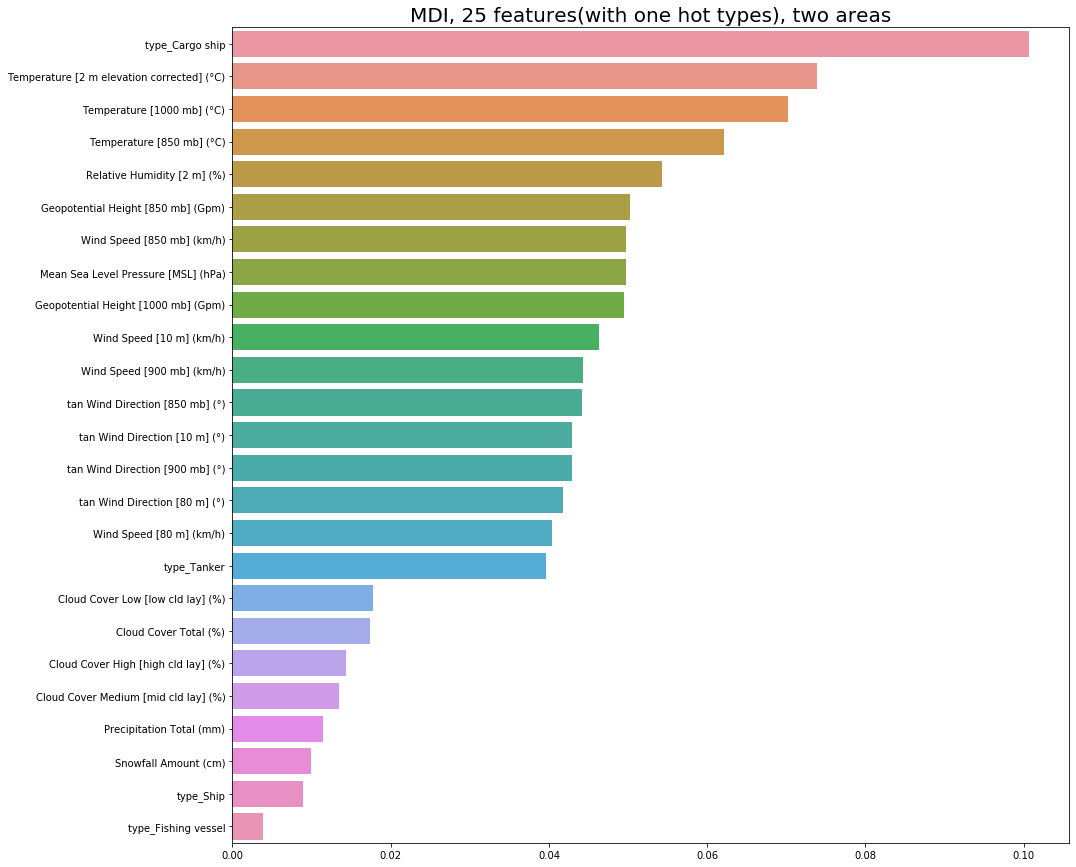

In [81]:
importances = sorted(list(zip(model.best_estimator_.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 features(with one hot types), two areas', fontsize=20)
plt.show()

**Попробуем обучить на самых важных признаках** -  без последних восьми маленьких

В том числе без cloud cover, snowfall amount, precipitation total

In [90]:
imp_features = [x[1] for x in importances[:-8]]

In [93]:
X = X[imp_features] # one hot types - the last X

y = ships_avg_weather['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [95]:
# best estimator using random search - без дурацких признаков градусов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_rf = RandomForestRegressor()

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


model = RandomizedSearchCV(regr_rf, parameters, n_iter = 120, 
                         cv = 5, verbose=2, random_state=42,
                         n_jobs = -1)

model.fit(X_train, y_train)

print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

print(model.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  8.3min finished


---train---
RMSE =  0.00016029964719447423
MAE =  2.7473832356220477e-05
---test---
RMSE =  6.68013975503914
MAE =  4.60821192128571
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


Стало хуже, модель больше переобучилась

Это значит, что данные признаки важны для обучения модели

Получение оценки Mean Decrease Impurity

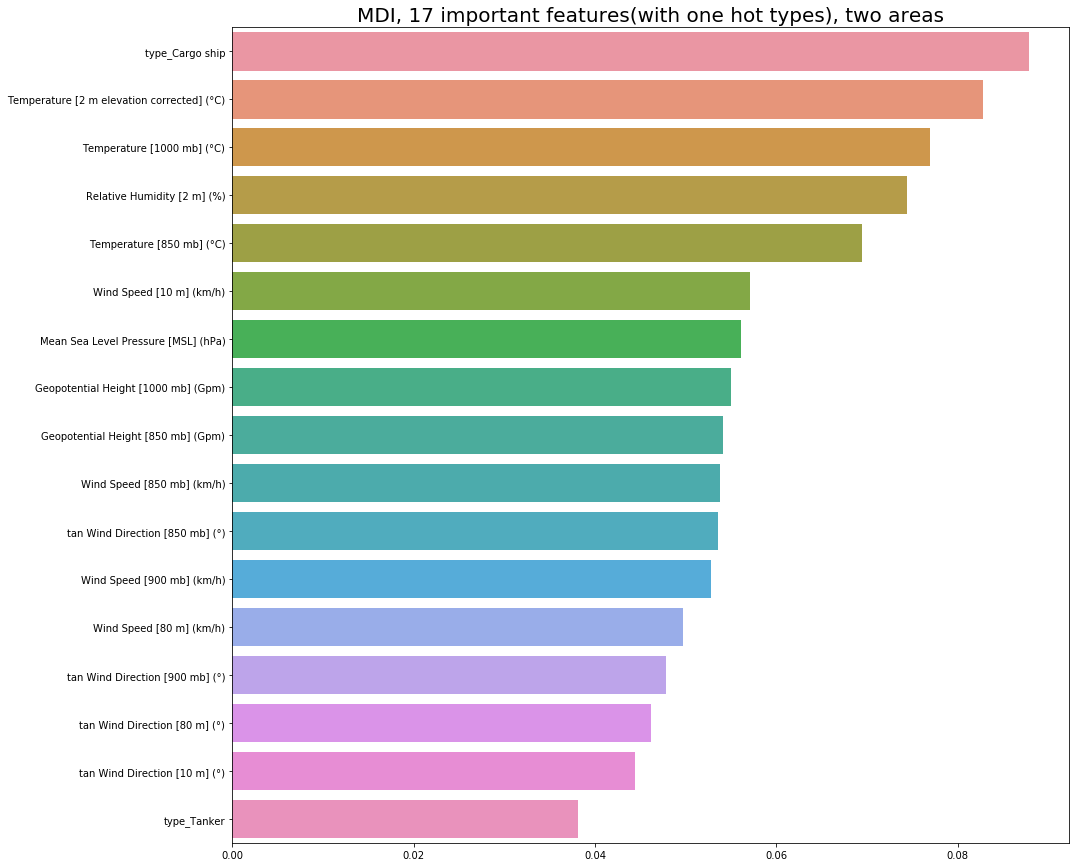

In [102]:
importances = sorted(list(zip(model.best_estimator_.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 17 important features(with one hot types), two areas', fontsize=20)
plt.show()

Распределение абсолютной разности между истинным значением скорости и предсказанным

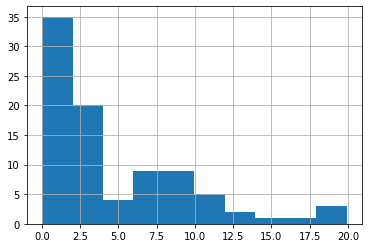

In [117]:
np.abs(y_test - model.predict(X_test)).hist()

In [116]:
ships_avg_weather.loc[X_test[np.abs(y_test - model.predict(X_test)) > 7.].index,
                     ships_avg_weather.columns[:-43]]

Unnamed: 0       MMSI        type          zone   entryTime  \
271         271  372665000  Cargo ship         Japan  1569167775   
552         552  636014219  Cargo ship         Japan  1517375562   
187         187  303584000  Cargo ship         Japan  1517141681   
356         356  431007841  Cargo ship         Japan  1522664880   
388         388  431101012  Cargo ship         Japan  1579871286   
564         564  636015992  Cargo ship         Japan  1561365721   
459         459  477764600  Cargo ship         Japan  1567688033   
417         417  432760000        Ship         Japan  1564194896   
585         585  636092792  Cargo ship         Japan  1585356406   
437         437  477189300  Cargo ship         Japan  1560452535   
246         246  367438000  Cargo ship         Japan  1564162100   
32           32  316035891      Tanker  Newfoundland  1556270795   
487         487  538004243  Cargo ship         Japan  1537936373   
247         247  368680000  Cargo ship         Japan  1519034716   
549         549  566673000  Cargo ship         Japan  1569586503   
508         508  538005960  Cargo ship         Japan  1570646370   
88           88  218042000  Cargo ship         Japan  1560913953   
438         438  477189300  Cargo ship         Japan  1577558239   
100         100  220594000  Cargo ship         Japan  1585083603   
450         450  477738500  Cargo ship         Japan  1558969813   
584         584  636092792  Cargo ship         Japan  1578849920   
86           86  209087000  Cargo ship         Japan  1570571879   
553         553  636014219  Cargo ship         Japan  1570272377   
590         590  636092871  Cargo ship         Japan  1566251889   

     entryLatitude  entryLongitude entryDraft   leaveTime  leaveLatitude  \
271      41.570150      143.002700       12.9  1569168170      41.569567   
552      41.606767      142.990833       13.7  1517376102      41.604683   
187      41.616417      142.982350        9.8  1517141717      41.616417   
356      41.618103      142.933405        4.8  1522665040      41.621583   
388      41.550667      143.072883        6.8  1579871903      41.529200   
564      41.614250      142.994100        8.8  1561366308      41.610517   
459      41.623470      142.984860       13.8  1567688765      41.623775   
417      41.613000      143.082000        5.1  1564206226      41.573667   
585      41.592555      142.928352       13.8  1585357420      41.590643   
437      41.637548      142.930798       12.7  1560453484      41.635000   
246      41.622853      142.919638       10.7  1564162377      41.625540   
32       46.250977      -53.286880        9.3  1556274415      46.253190   
487      41.622483      142.973700       14.3  1537937244      41.623890   
247      41.586947      142.923108       11.9  1519035644      41.595618   
549      41.616337      142.921952       12.4  1569587677      41.623797   
508      41.633862      142.949343        9.1  1570646975      41.621458   
88       41.615987      142.930195       12.4  1560914941      41.616225   
438      41.625680      143.030847       10.2  1577558846      41.625828   
100      41.592713      142.958452       12.1  1585084503      41.590987   
450      41.634000      143.039683       11.7  1558970557      41.634433   
584      41.592433      142.935618       13.8  1578850754      41.590900   
86       41.613645      142.968627       13.5  1570572005      41.614692   
553      41.602183      142.972000       11.1  1570273241      41.621550   
590      41.630843      142.925402       10.3  1566252867      41.630308   

     leaveLongitude leaveDraft   distance  actTimeInZone  avg_speed  
271      143.048107       12.9   3.777973            395  34.432156  
552      143.054633       13.7   5.309645            540  35.397632  
187      142.987197        9.8   0.402932             36  40.293207  
356      142.938425        4.8   0.569095            160  12.804633  
388      143.022500        6.8   4.825115            

In [109]:
ships_avg_weather.columns

Index(['Unnamed: 0', 'MMSI', 'type', 'zone', 'entryTime', 'entryLatitude',
       'entryLongitude', 'entryDraft', 'leaveTime', 'leaveLatitude',
       'leaveLongitude', 'leaveDraft', 'distance', 'actTimeInZone',
       'avg_speed', 'Temperature [2 m elevation corrected] (°C)',
       'Relative Humidity [2 m] (%)', 'Mean Sea Level Pressure [MSL] (hPa)',
       'Precipitation Total (mm)', 'Snowfall Amount (cm)',
       'Cloud Cover Total (%)', 'Cloud Cover High [high cld lay] (%)',
       'Cloud Cover Medium [mid cld lay] (%)',
       'Cloud Cover Low [low cld lay] (%)', 'Wind Speed [10 m] (km/h)',
       'Wind Direction [10 m] (°)', 'Wind Speed [80 m] (km/h)',
       'Wind Direction [80 m] (°)', 'Wind Speed [900 mb] (km/h)',
       'Wind Direction [900 mb] (°)', 'Wind Speed [850 mb] (km/h)',
       'Wind Direction [850 mb] (°)', 'Geopotential Height [1000 mb] (Gpm)',
       'Geopotential Height [850 mb] (Gpm)', 'Temperature [1000 mb] (°C)',
       'Temperature [850 mb] (°C)', 'x coord W

**получение Permutation Importance - MDA**

In [7]:
import rfpimp

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
features = ['type', *weather_features,
                                            *["tan " + col for col in direct_columns]]

In [20]:
len(features)

22

In [21]:
X = pd.get_dummies(ships_avg_weather[features]) # one hot type

y = ships_avg_weather['avg_speed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [12]:
# best estimator using random search - без дурацких признаков градусов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_rf = RandomForestRegressor()

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


model = RandomizedSearchCV(regr_rf, parameters, n_iter = 120, 
                         cv = 5, verbose=2, random_state=42,
                         n_jobs = -1)

model.fit(X_train, y_train)

print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.2min finished


---train---
RMSE =  0.0002840090585446104
MAE =  4.480607136954133e-05
---test---
RMSE =  5.992726347220944
MAE =  3.9941018728876148


In [14]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

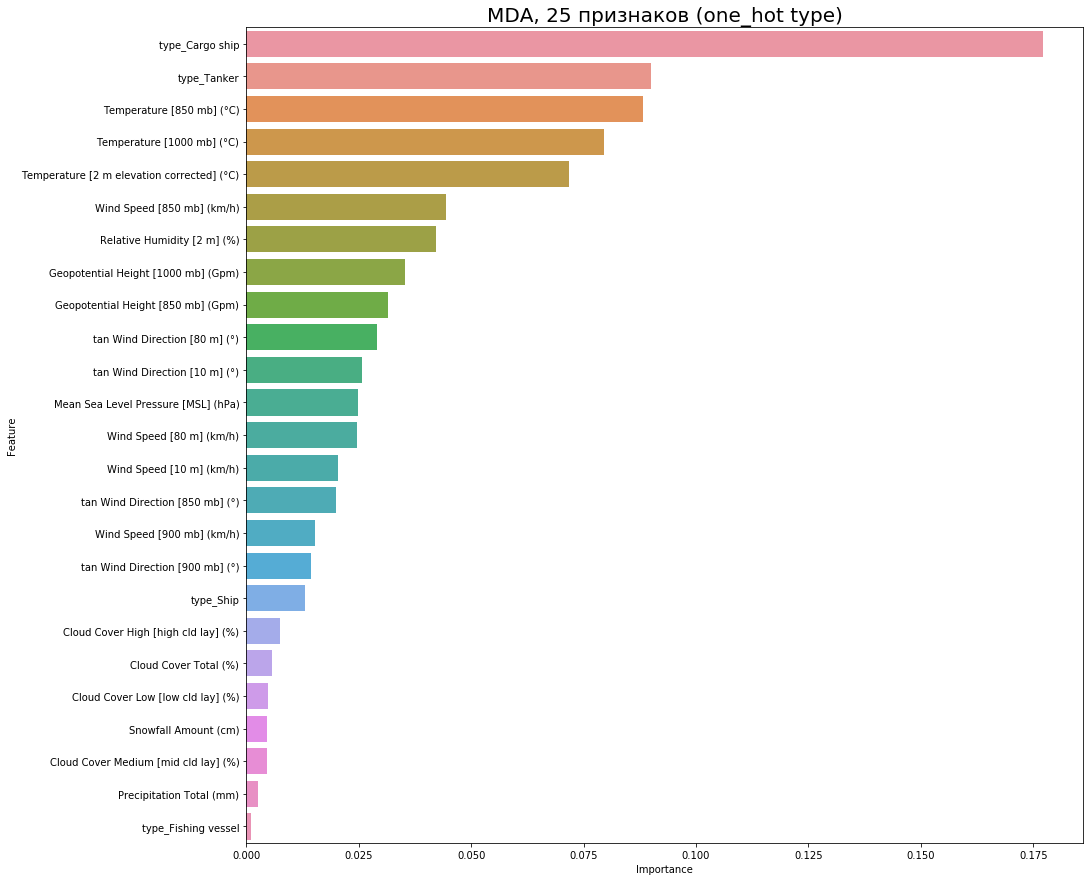

In [40]:
rf = model.best_estimator_

imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

Удаляем неважные признаки - 2 штуки

In [47]:
imp_features = imp.index.values[:-3]

In [49]:
X = pd.get_dummies(ships_avg_weather[features])[imp_features] # one hot types - the last X

y = ships_avg_weather['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [103]:
# best estimator using random search - без дурацких признаков градусов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_rf = RandomForestRegressor()

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


model = RandomizedSearchCV(regr_rf, parameters, n_iter = 140, 
                         cv = 5, verbose=2, random_state=42,
                         n_jobs = -1)

model.fit(X_train, y_train)

print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

Fitting 4 folds for each of 140 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s


KeyboardInterrupt: 

In [43]:
def get_rf(X_train, X_test, y_train, y_test):
    regr_rf = RandomForestRegressor()

    parameters = {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]}


    model = RandomizedSearchCV(regr_rf, parameters, n_iter = 160, 
                             cv = 5, verbose=2, random_state=42,
                             n_jobs = -1)

    model.fit(X_train, y_train)

    print("---train---")
    print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
    print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

    print("---test---")
    print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
    print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))
    
    print(model.best_params_)
    
    return model.best_estimator_

**Использование данных для зоны Японии**

In [74]:
data = ships_avg_weather[ships_avg_weather.zone == "Japan"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.3min finished


---train---
RMSE =  5.196423999554623e-07
MAE =  3.802412693366339e-08
---test---
RMSE =  5.840320370423477
MAE =  3.8808916706980634
{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Распределение признаков на тренировачном датасете

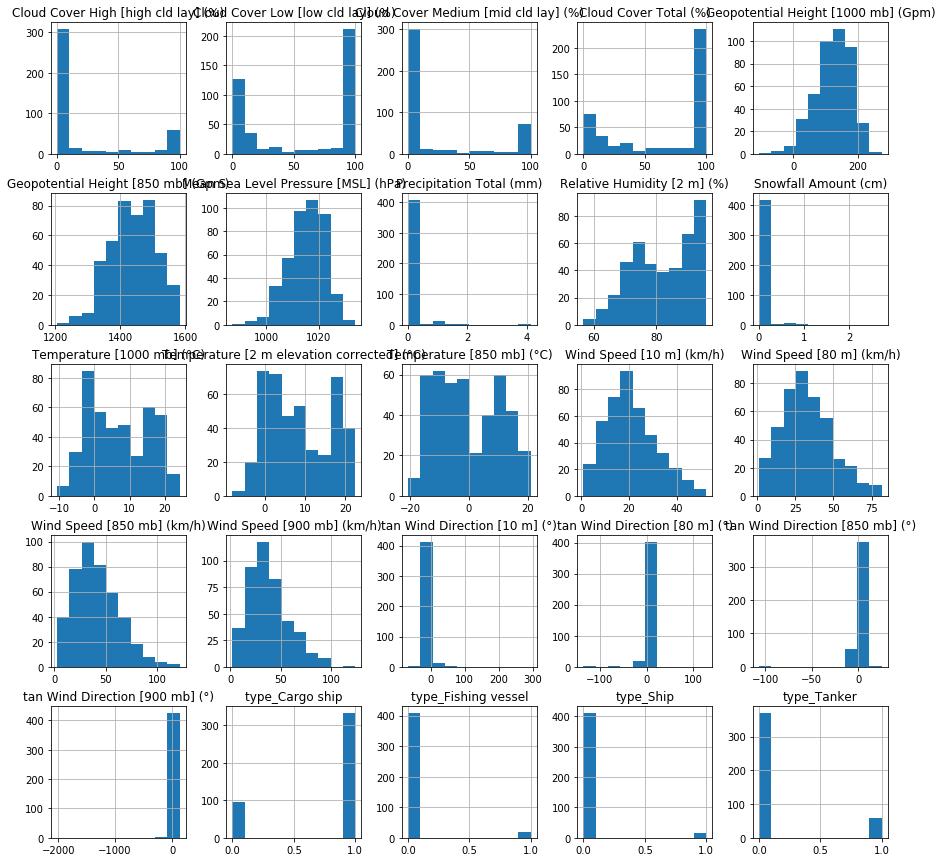

In [72]:
X_train.hist(figsize=(15, 15))

plt.show()

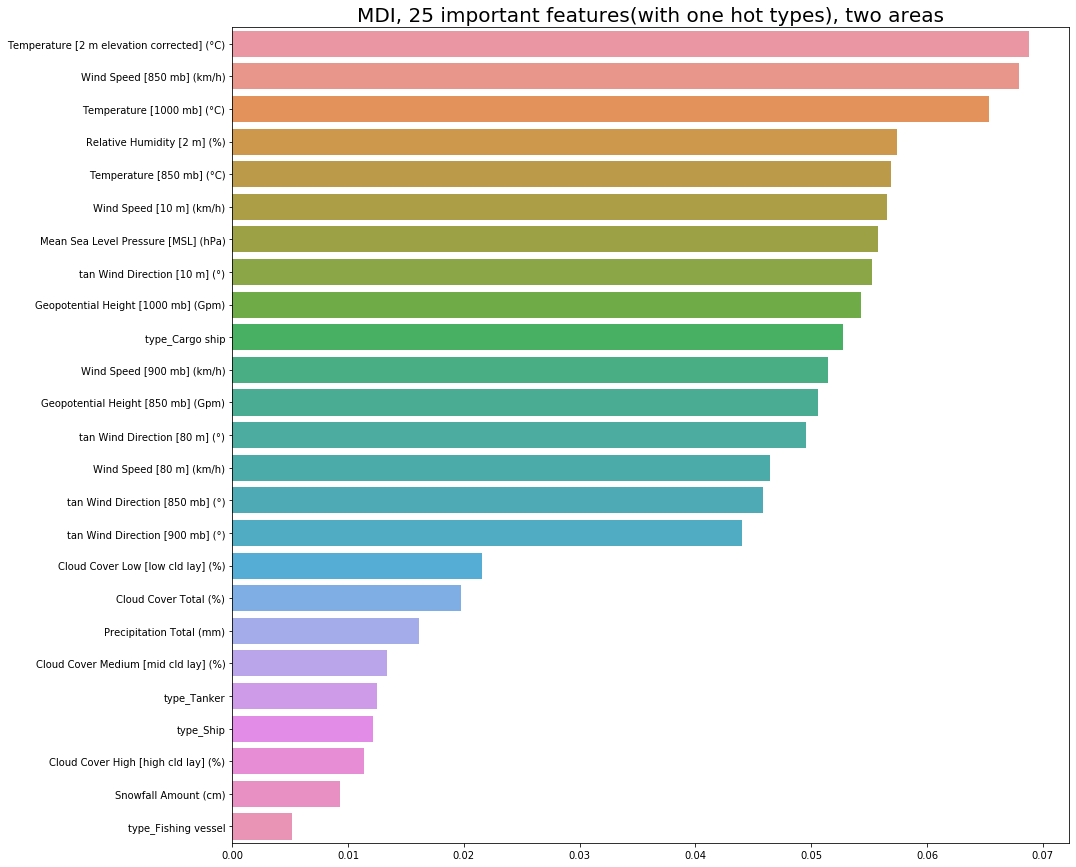

In [75]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 important features(with one hot types), two areas', fontsize=20)
plt.show()

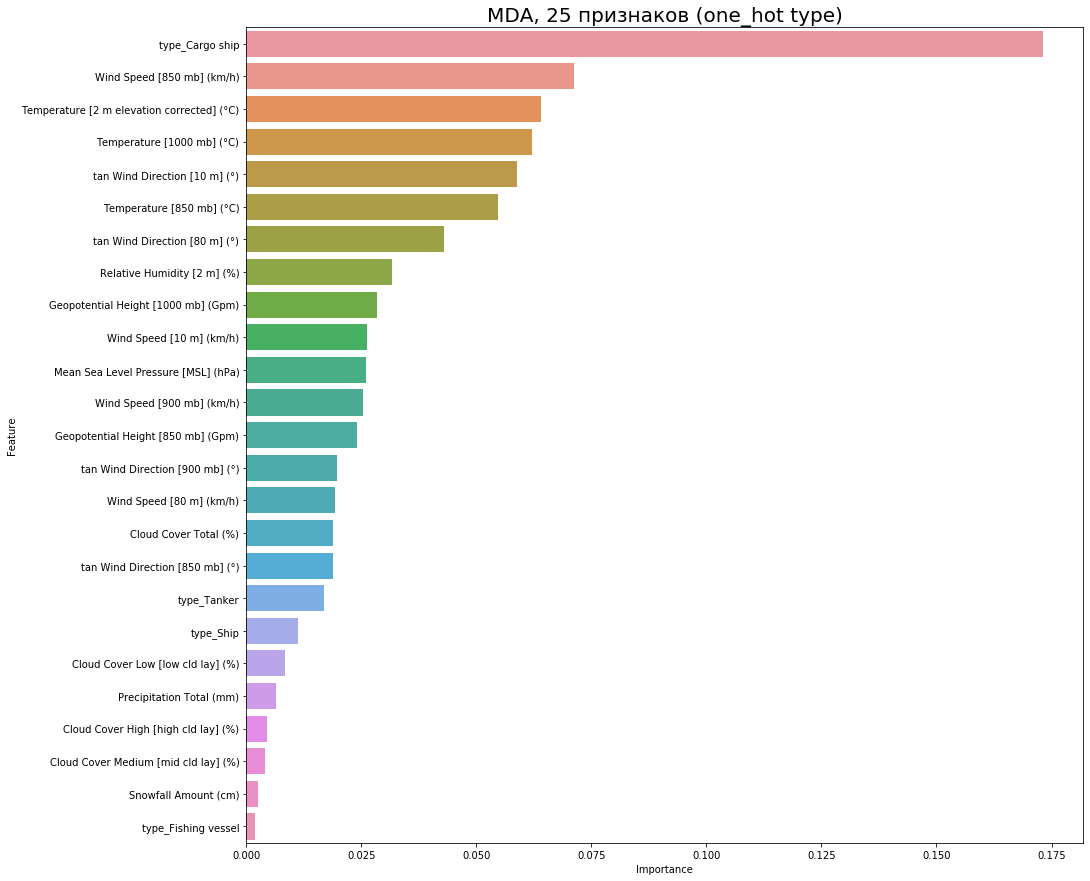

In [83]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

Результат примерно такой же как и общий - все также наименее важны snowfall amount, perception, cloud cover

**Использование данных для зоны Ньюфаундленда**

In [86]:
data = ships_avg_weather[ships_avg_weather.zone == "Newfoundland"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.3min finished


---train---
RMSE =  3.8620269702060073
MAE =  2.9493975267004275
---test---
RMSE =  6.283604210410234
MAE =  5.346879647812312
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


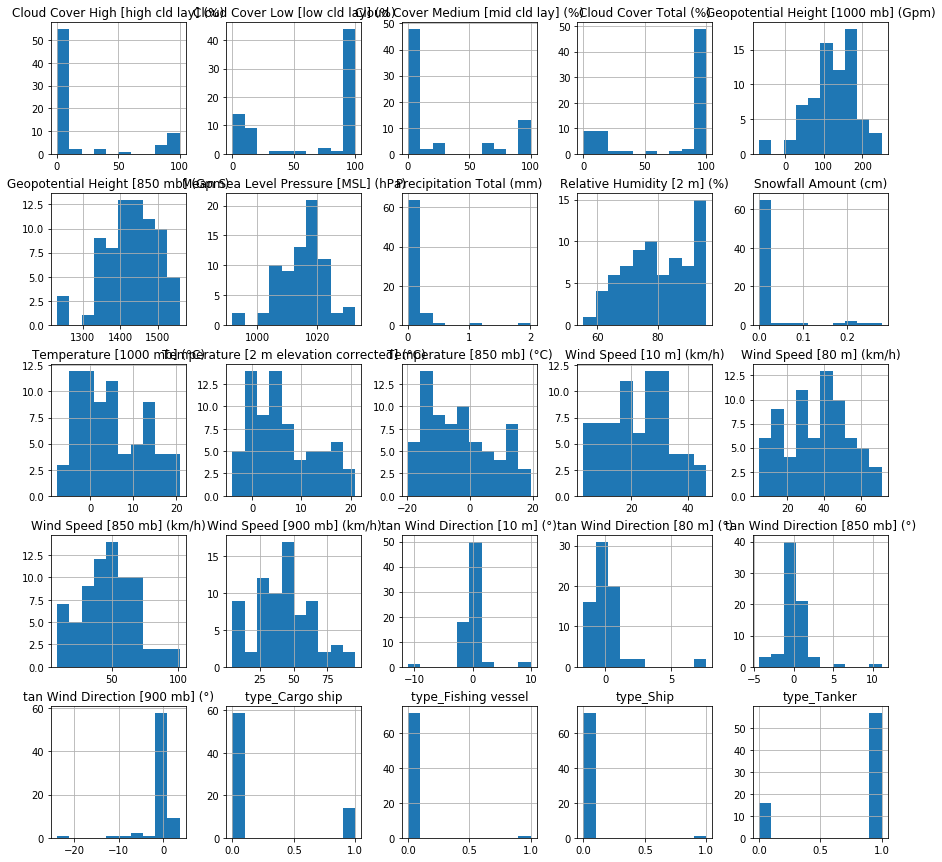

In [87]:
X_train.hist(figsize=(15, 15))

plt.show()

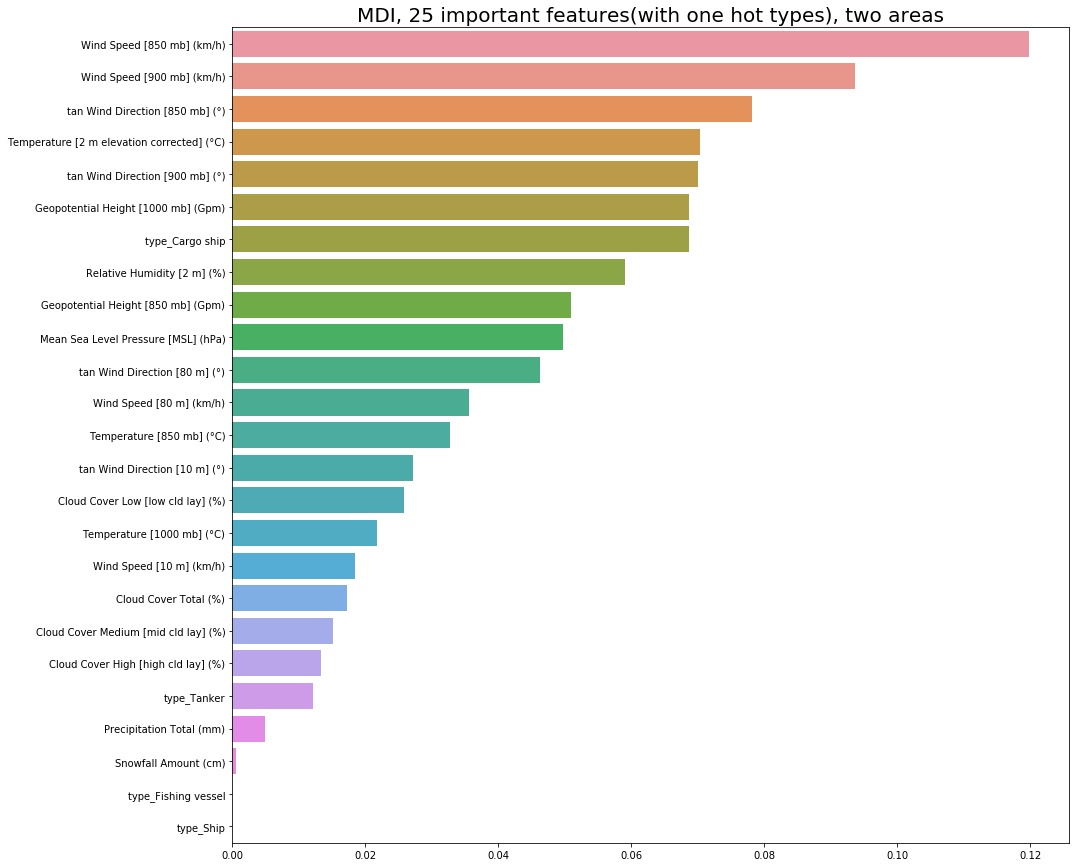

In [92]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 important features(with one hot types), two areas', fontsize=20)
plt.show()

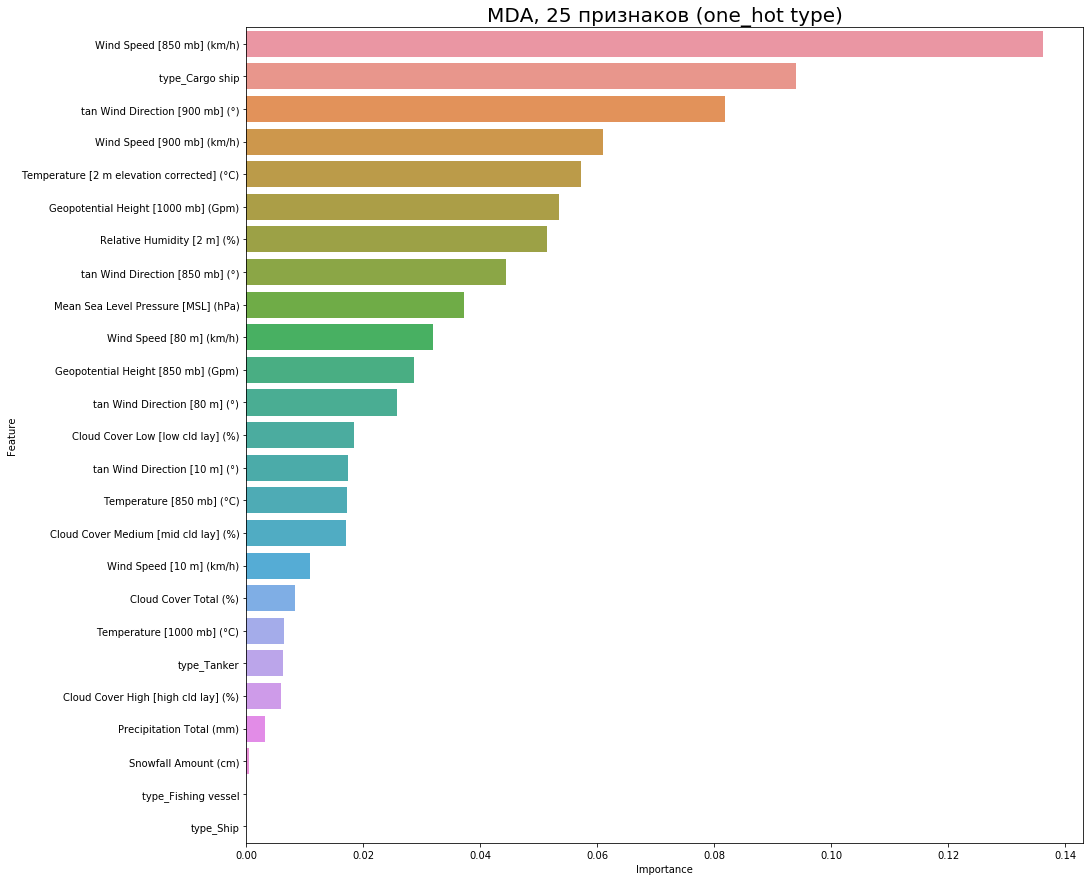

In [88]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

**Использование только грузовых кораблей**

In [106]:
data = ships_avg_weather[ships_avg_weather.type == "Cargo ship"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 140 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  5.5min finished


---train---
RMSE =  2.5503696296544027
MAE =  1.7701405982946332
---test---
RMSE =  4.93647819876433
MAE =  3.359890417067319
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


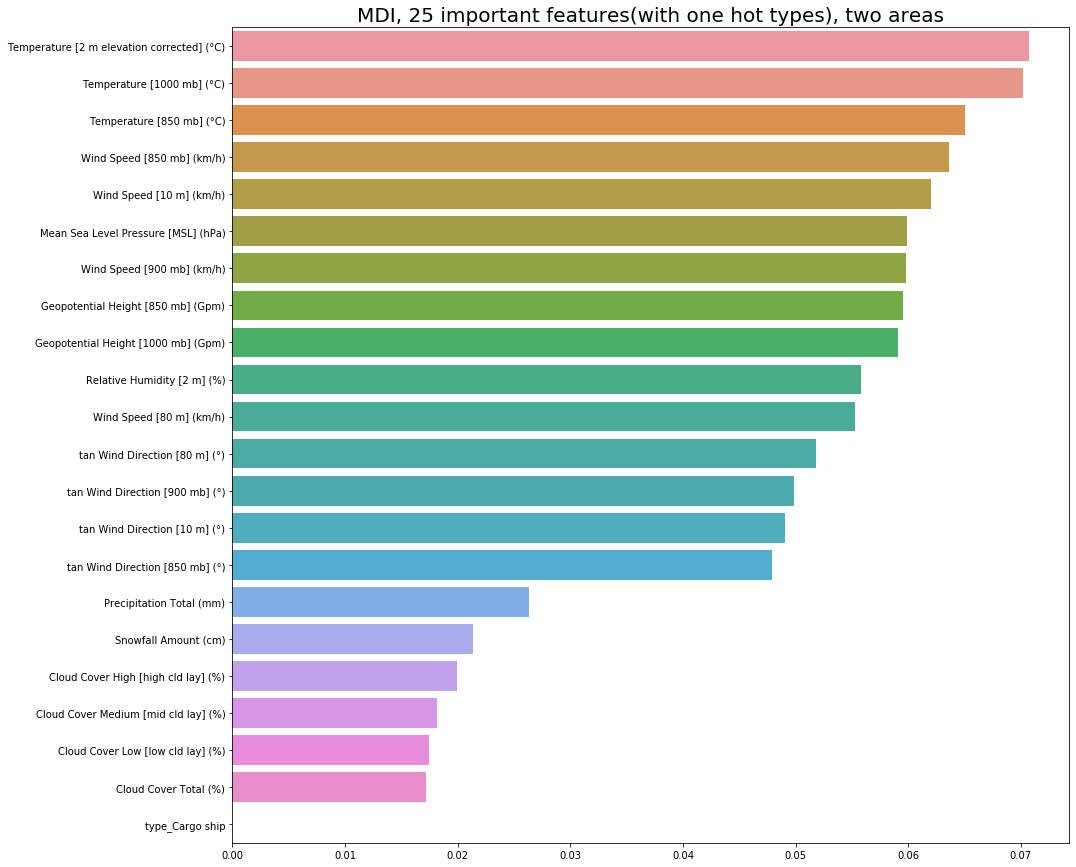

In [107]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 important features(with one hot types), two areas', fontsize=20)
plt.show()

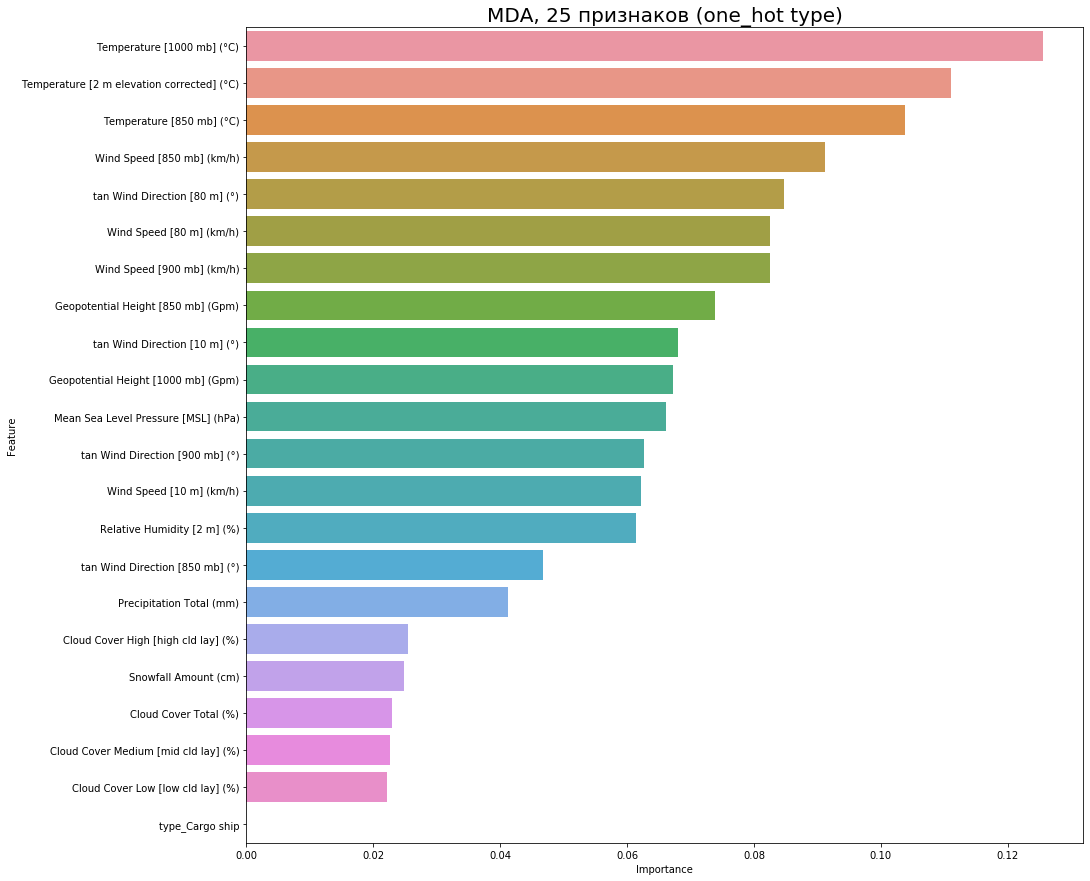

In [108]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

**Только Танкеры**

In [112]:
data = ships_avg_weather[ships_avg_weather.type == "Tanker"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 140 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  3.2min finished


---train---
RMSE =  2.591279887901486
MAE =  2.0666904498761087
---test---
RMSE =  5.107866599348884
MAE =  4.086435881170415
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


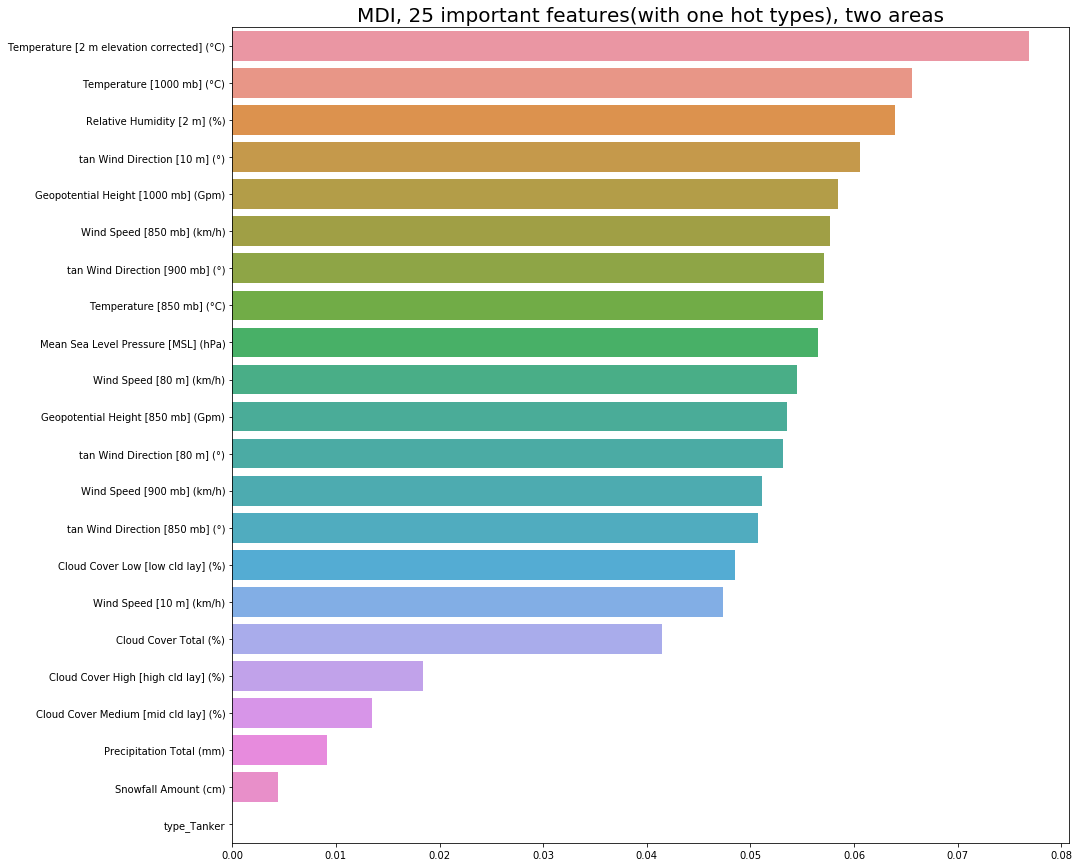

In [114]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 important features(with one hot types), two areas', fontsize=20)
plt.show()

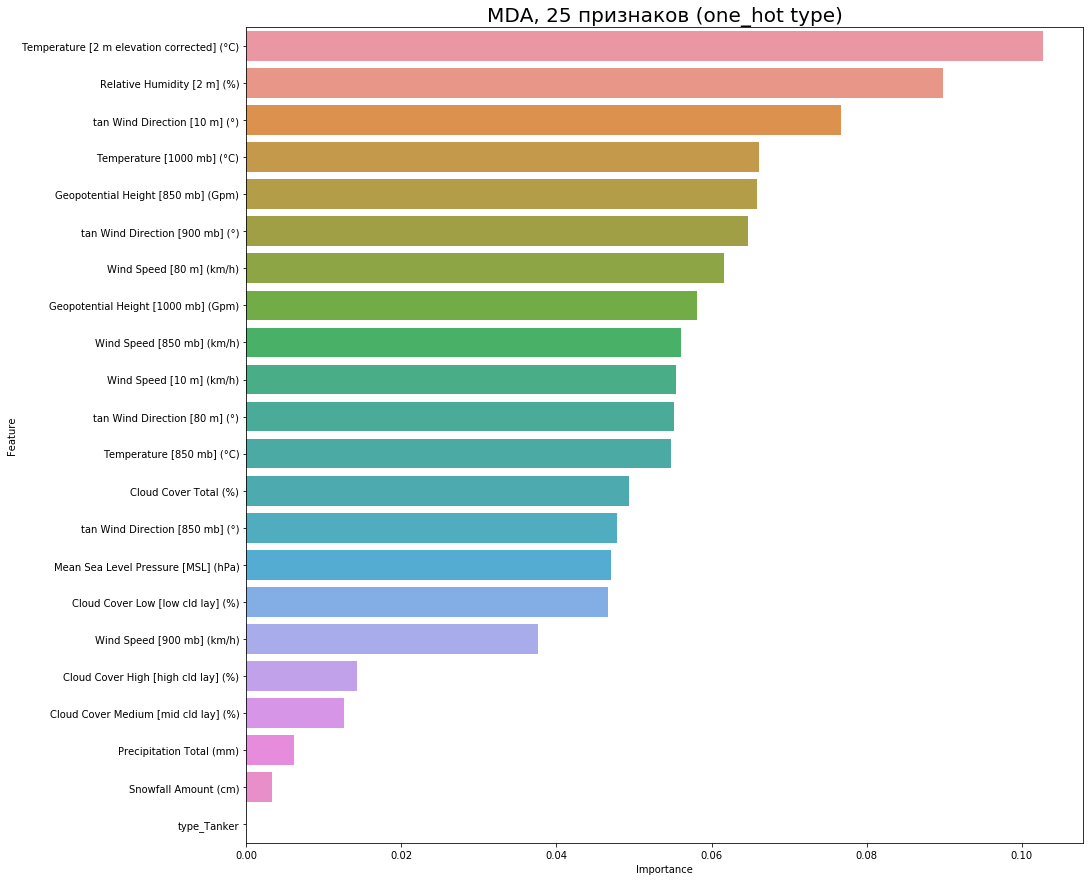

In [113]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

**Модель без скоррелированных фичей**

In [123]:
data = ships_avg_weather

X = pd.get_dummies(data[features].drop(columns=corr_columns)) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.4min finished


---train---
RMSE =  2.3246096115568887e-08
MAE =  1.504762902475318e-09
---test---
RMSE =  5.875134970323995
MAE =  3.798937584677177
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


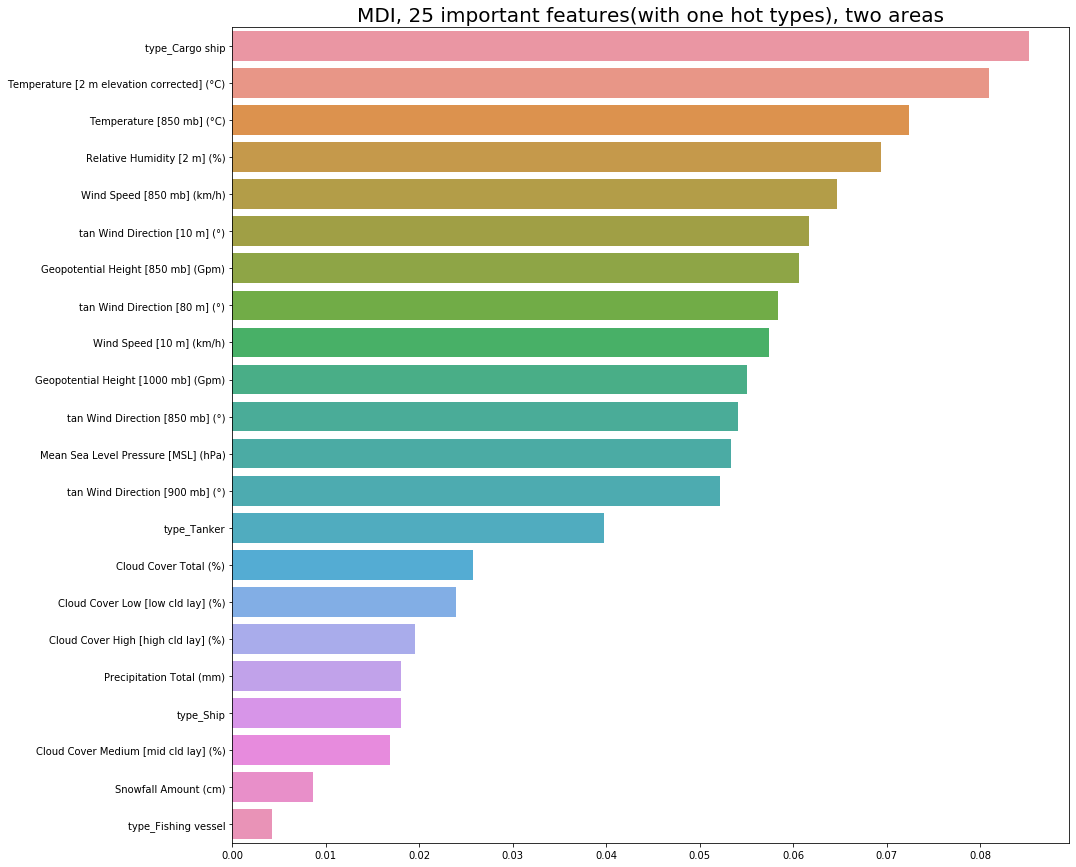

In [124]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 25 important features(with one hot types), two areas', fontsize=20)
plt.show()

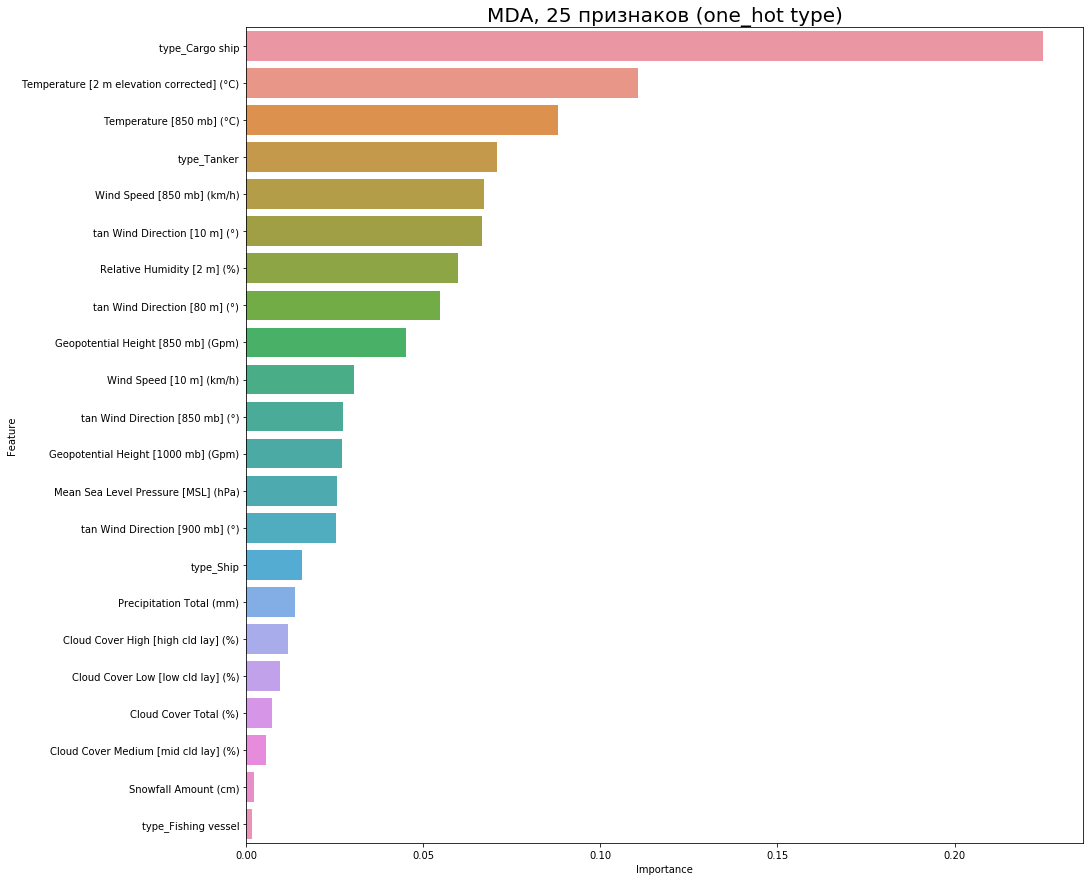

In [125]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков (one_hot type)', fontsize=20)
plt.show()

**Только грузовые корабли без скоррелированных фичей**

In [131]:
data = ships_avg_weather[ships_avg_weather.type == "Cargo ship"]

X = pd.get_dummies(data[features].drop(columns=corr_columns)) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.2min finished


---train---
RMSE =  2.2503730945712914
MAE =  1.5257410854784876
---test---
RMSE =  7.979760416441135
MAE =  5.879737155639086
{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


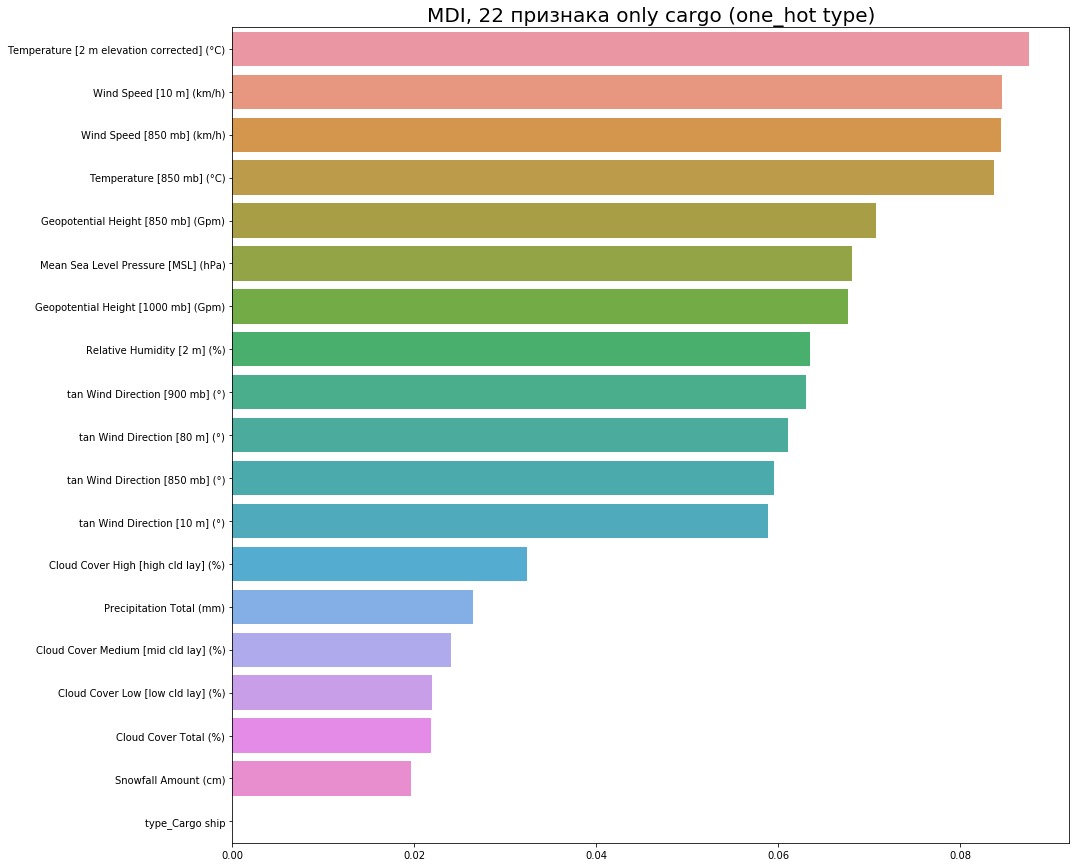

In [132]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 22 признака only cargo (one_hot type)', fontsize=20)
plt.show()

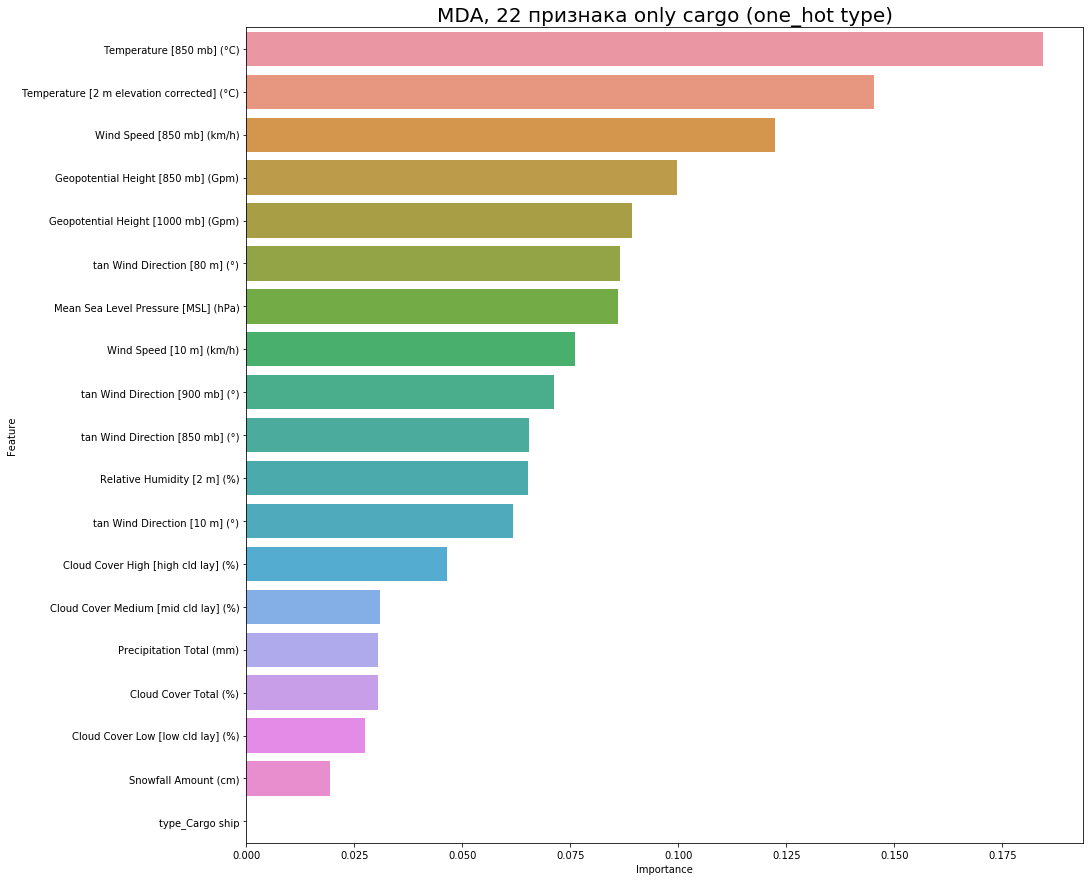

In [133]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 22 признака only cargo (one_hot type)', fontsize=20)
plt.show()

**Только танкеры, без скоррелированных фичей**

In [135]:
data = ships_avg_weather[ships_avg_weather.type == "Tanker"]

X = pd.get_dummies(data[features].drop(columns=corr_columns)) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min


---train---
RMSE =  2.4926467289559766e-14
MAE =  1.8407894256508175e-14
---test---
RMSE =  7.361767948805984
MAE =  5.416439671700979
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.4min finished


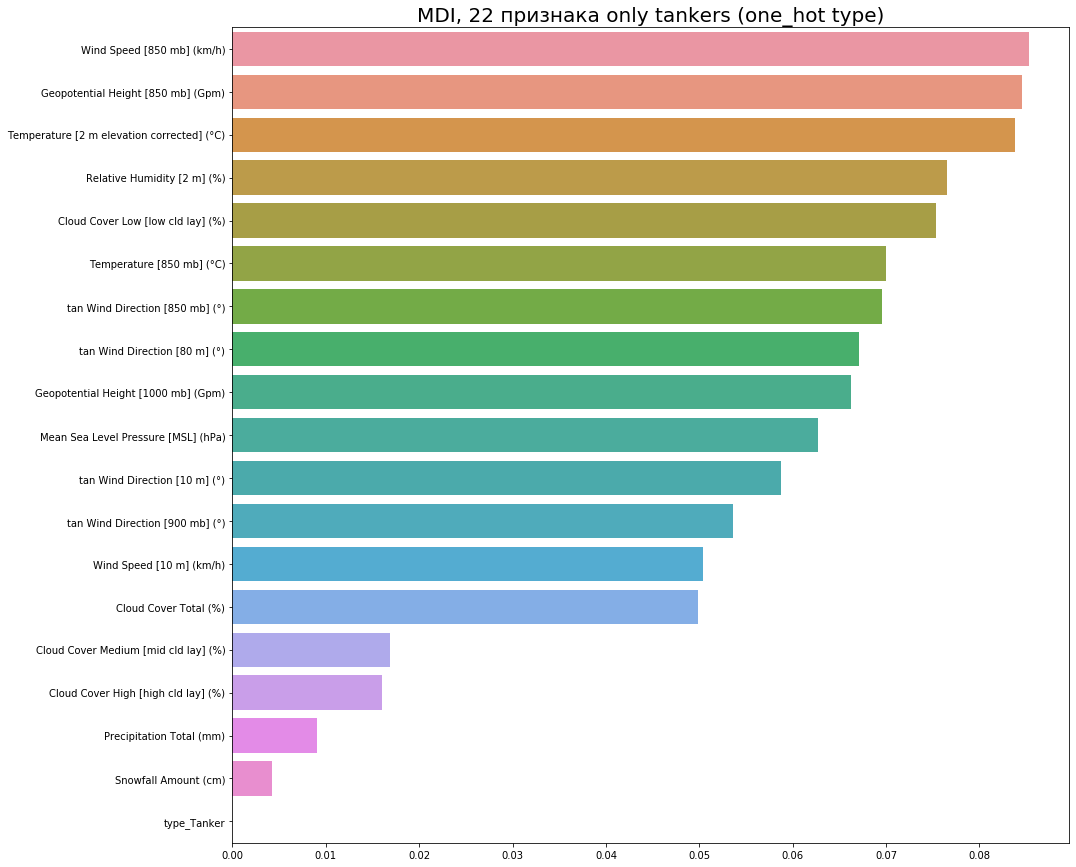

In [136]:
importances = sorted(list(zip(rf.feature_importances_, X_train.columns.values)),
            key=lambda x: x[0], reverse=True)

plt.figure(figsize=(15, 15))
sns.barplot(y=[x[1] for x in importances], x=[x[0] for x in importances])
plt.title('MDI, 22 признака only tankers (one_hot type)', fontsize=20)
plt.show()

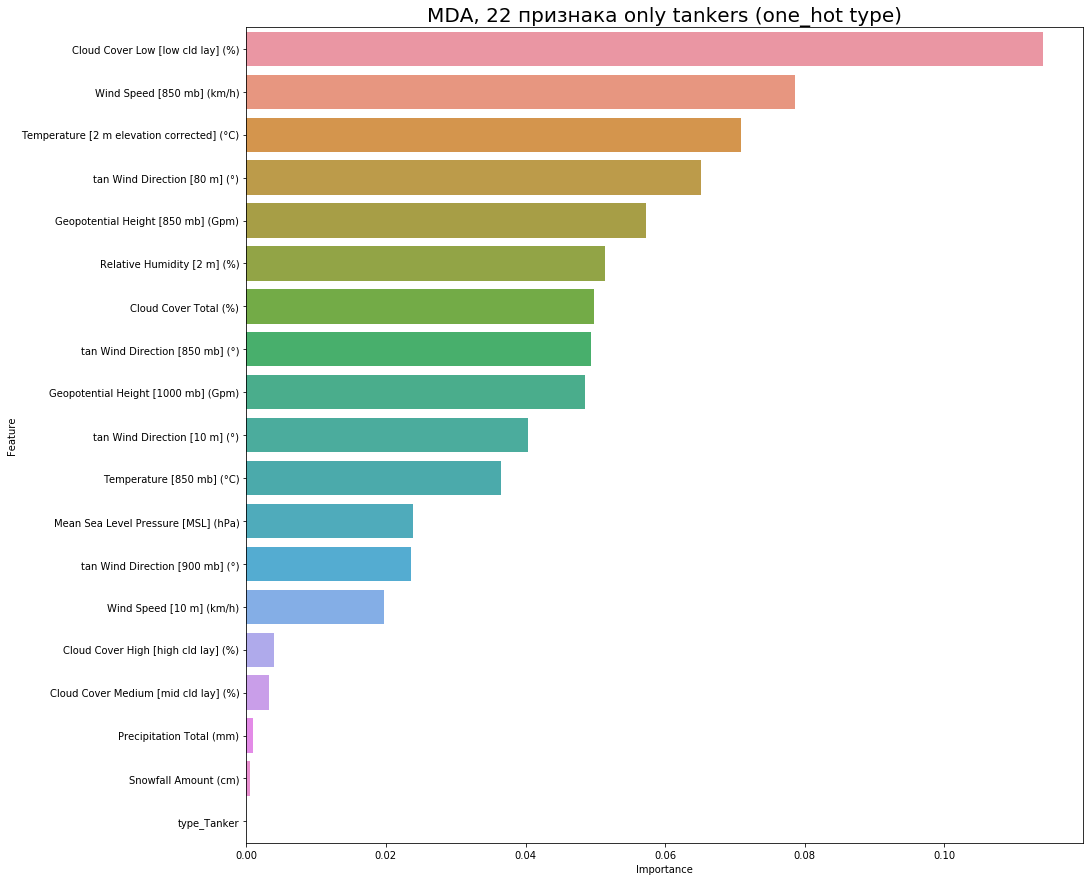

In [138]:
imp = rfpimp.importances(rf, X_train, y_train) # permutation

plt.figure(figsize=(15, 15))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 22 признака only tankers (one_hot type)', fontsize=20)
plt.show()

### Получение оценок важности MDA для групп признаков

In [28]:
grouped_weather_features = [
    ['Temperature [2 m elevation corrected] (°C)',
    'Temperature [1000 mb] (°C)',
     'Temperature [850 mb] (°C)'],
     'Relative Humidity [2 m] (%)',
     'Mean Sea Level Pressure [MSL] (hPa)',
     'Precipitation Total (mm)',
     'Snowfall Amount (cm)',
     ['Cloud Cover Total (%)',
     'Cloud Cover High [high cld lay] (%)',
     'Cloud Cover Medium [mid cld lay] (%)',
     'Cloud Cover Low [low cld lay] (%)'],
     ['Wind Speed [10 m] (km/h)',
     'Wind Speed [80 m] (km/h)',
     'Wind Speed [900 mb] (km/h)',
     'Wind Speed [850 mb] (km/h)'],
     ['Geopotential Height [1000 mb] (Gpm)',
     'Geopotential Height [850 mb] (Gpm)']
                    ]

In [11]:
features = ['type', *weather_features,
                                            *["tan " + col for col in direct_columns]]

In [12]:
data = ships_avg_weather

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.5min finished


---train---
RMSE =  1.2488589881727818
MAE =  0.7772906364272906
---test---
RMSE =  5.906058379733449
MAE =  3.91533571669769
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


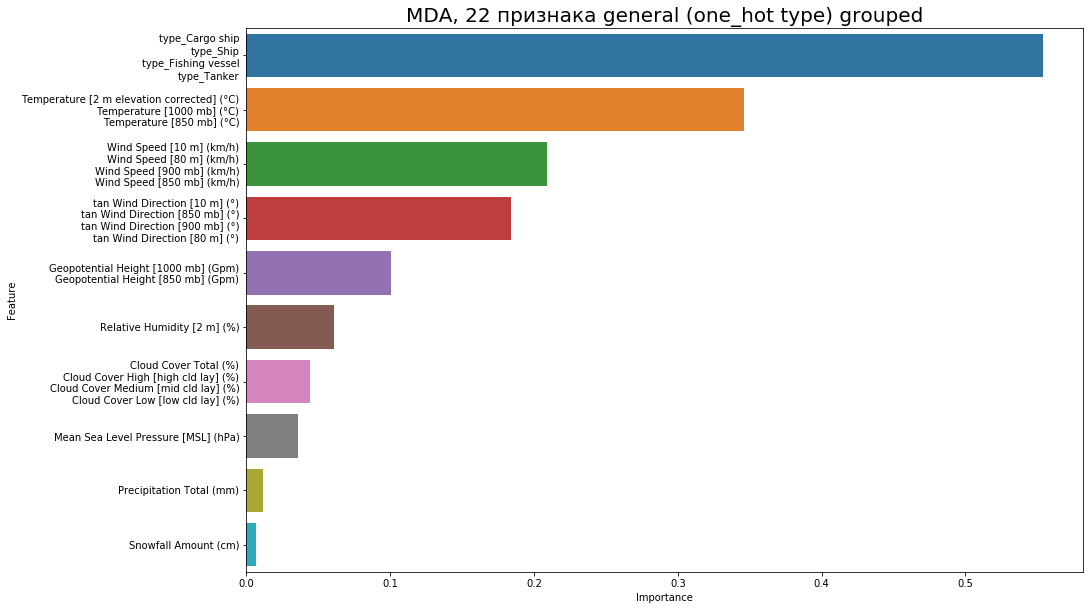

In [35]:
imp = rfpimp.importances(rf, X, y, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 22 признака general (one_hot type) grouped', fontsize=20)
plt.show()

Больше всего у type - данный признак оказывает наибольшее влияние

**Только грузовые корабли**

In [44]:
data = ships_avg_weather[ships_avg_weather.type == "Cargo ship"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.4min finished


---train---
RMSE =  2.4778568234766447
MAE =  1.70823140821929
---test---
RMSE =  5.993553951930833
MAE =  4.13220766424152
{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


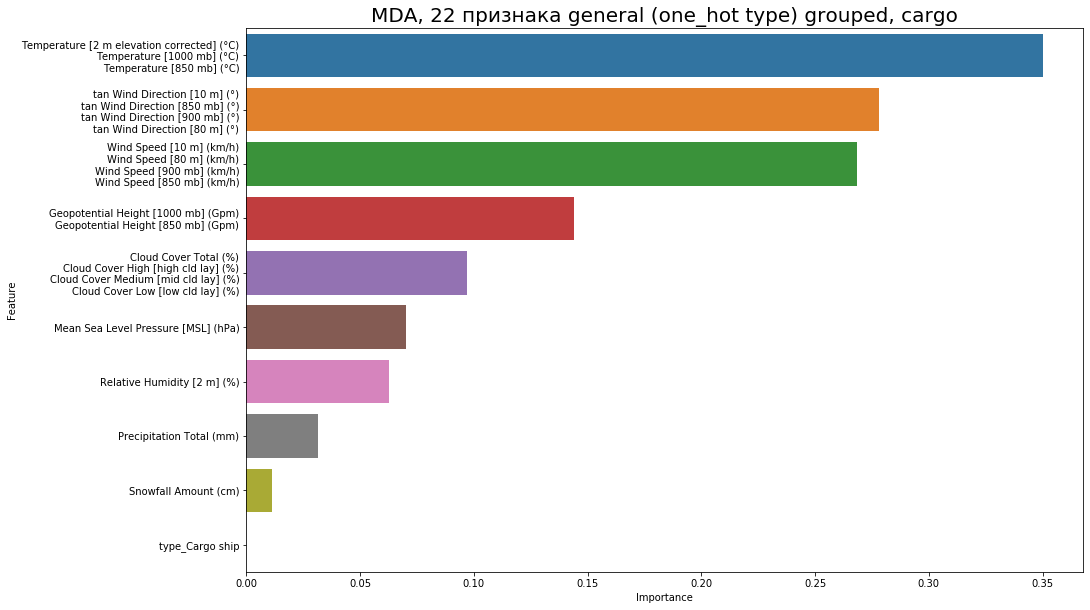

In [60]:
imp = rfpimp.importances(rf, X, y, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 22 признака general (one_hot type) grouped, cargo', fontsize=20)
plt.show()

In [112]:
data = ships_avg_weather[ships_avg_weather.type == "Cargo ship"]

X = data[features].drop(columns=["type"]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.5min finished


---train---
RMSE =  2.370783606788445
MAE =  1.6167678613839633
---test---
RMSE =  6.719194144503121
MAE =  4.6887290097940415
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


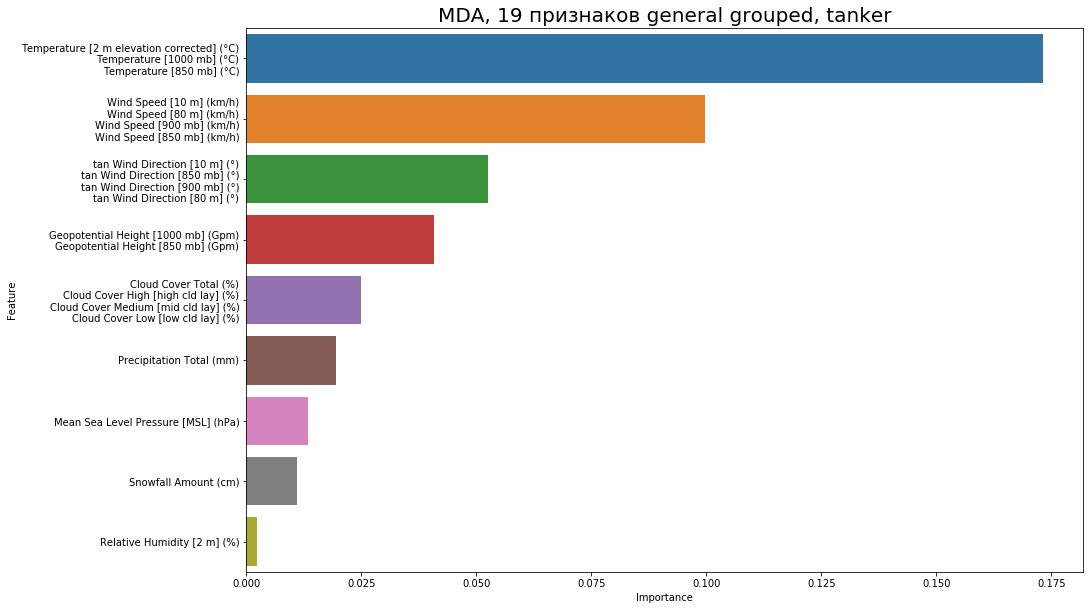

In [123]:
n=100

last_imp = rfpimp.importances(rf, X_test, y_test,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = rfpimp.importances(rf, X_test, y_test, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 19 признаков general grouped, tanker', fontsize=20)
plt.show()

То что так важно направление ветра можно сочитать с общим весом корабля. Чем меньше направление ветра, тем признаки ветра менее важны

**Данные по танкерам**

In [61]:
data = ships_avg_weather[ships_avg_weather.type == "Tanker"]

X = data[features].drop(columns=["type"]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  4.2min finished


---train---
RMSE =  4.613135554157978e-14
MAE =  3.651444226347524e-14
---test---
RMSE =  4.952605702284228
MAE =  3.681402456826241
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


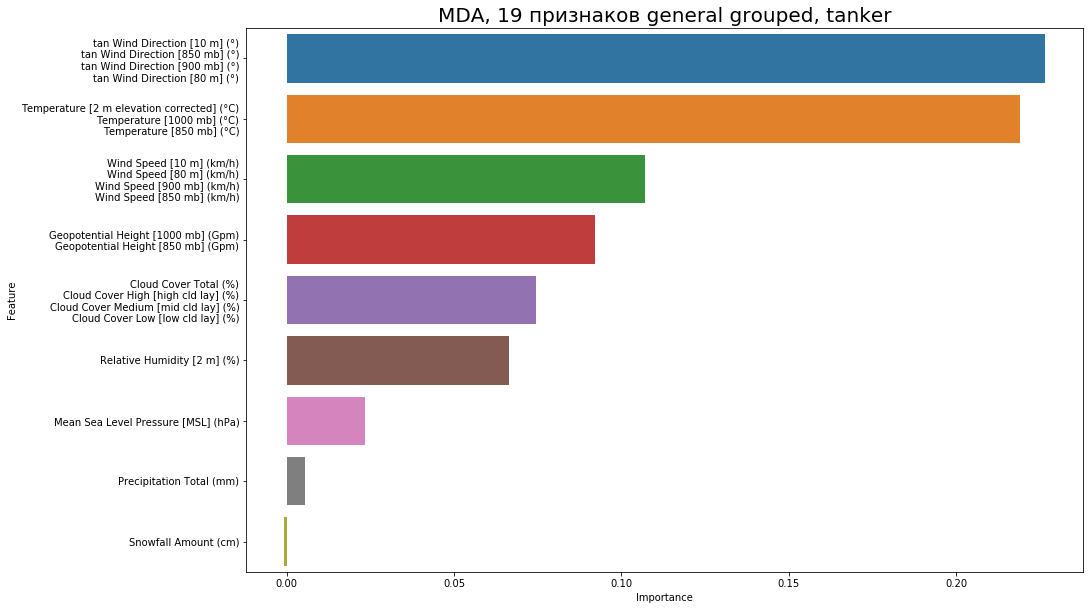

In [110]:
n=100

last_imp = rfpimp.importances(rf, X_test, y_test, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = rfpimp.importances(rf, X_test, y_test, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 19 признаков general grouped, tanker', fontsize=20)
plt.show()

**Данные для зоны Японии**

In [124]:
data = ships_avg_weather[ships_avg_weather.zone == "Japan"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  8.8min finished


---train---
RMSE =  6.709911418356253e-07
MAE =  5.435449436826919e-08
---test---
RMSE =  5.491337728229229
MAE =  3.759047966276034
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


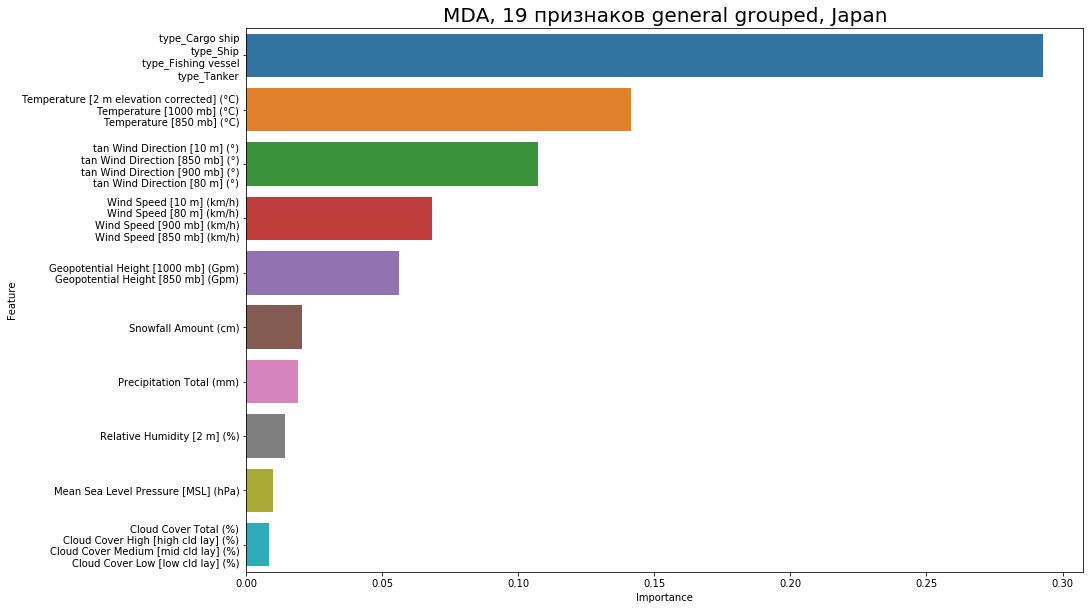

In [127]:
n=100

last_imp = rfpimp.importances(rf, X_test, y_test, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = rfpimp.importances(rf, X_test, y_test, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 19 признаков general grouped, Japan', fontsize=20)
plt.show()

**Данные для зоны Ньюфаундленда**

In [128]:
data = ships_avg_weather[ships_avg_weather.zone == "Newfoundland"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = get_rf(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min


---train---
RMSE =  4.401672301291596
MAE =  3.4966345317005567
---test---
RMSE =  5.709792558014351
MAE =  4.6332720235117515
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  3.9min finished


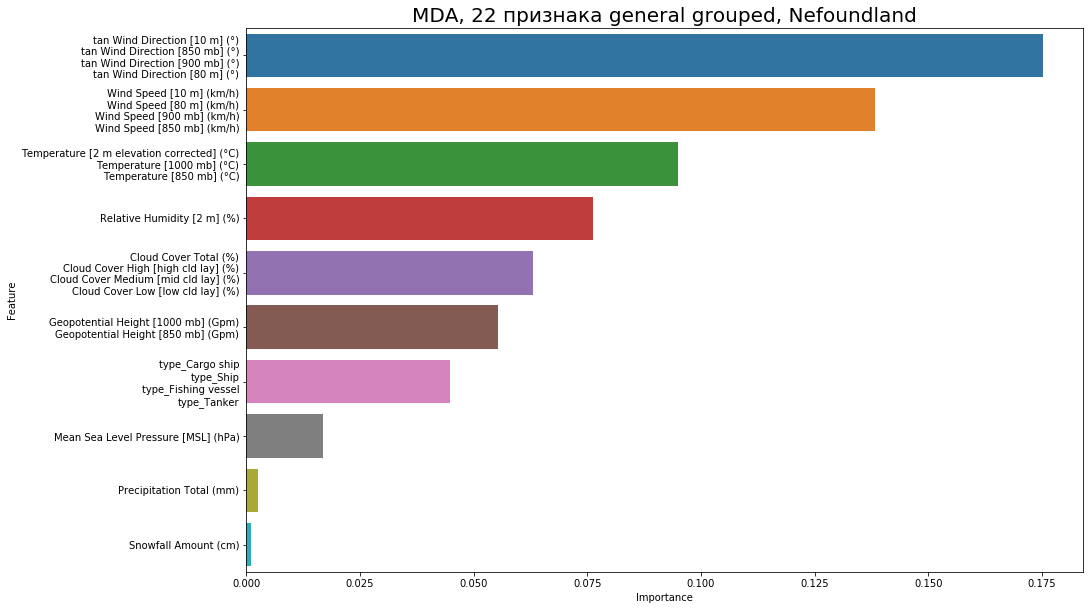

In [135]:
n=100

last_imp = rfpimp.importances(rf, X, y, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = rfpimp.importances(rf, X, y, 
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 22 признака general grouped, Nefoundland', fontsize=20)
plt.show()

Мы можем видеть, что для зоны Ньюфаундленда - больше всего влияет ветер, а температура меньше влияет. Для модели, построенной на данных Японии - наоборот.

Можно предположить, что Ньюфаундленд чаще имеет ветренную и плохую погоду, а также возможно, что ветер редко меняет свое направление

А около зоны Японии погода более разнообразна, переменчивая, и все погодные условия сильно зависят от температуры

In [103]:
(last_imp / n).sort_values(by="Importance", ascending=False)

Importance
Feature                                                       
Temperature [2 m elevation corrected] (°C)\nTem...    0.237820
tan Wind Direction [10 m] (°)\ntan Wind Directi...    0.230407
Wind Speed [10 m] (km/h)\nWind Speed [80 m] (km...    0.114633
Geopotential Height [1000 mb] (Gpm)\nGeopotenti...    0.086713
Cloud Cover Total (%)\nCloud Cover High [high c...    0.070314
Relative Humidity [2 m] (%)                           0.066258
Mean Sea Level Pressure [MSL] (hPa)                   0.022047
Precipitation Total (mm)                              0.005864
Snowfall Amount (cm)                                 -0.000910

### Модели Градиентного бустинга

### Использование метода MDA  и SHAP values

In [1]:
from catboost import CatBoostRegressor
from catboost import Pool

import shap

Для градиентного бустинга библиотека rfpimp не предназначена, поэтому напишем свой метод для подсчета MDA для групп признаков

In [34]:
def mse(m, X, y): 
    return metrics.mean_squared_error(y,m.predict(X))

metrics.mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)>

In [41]:
def permutation_importances(model, X, y, metric, features):
    baseline = metric(model, X, y)
    imp = []
    for group in features:
        if isinstance(group, str):
            save = X[col].copy()
            X[col] = np.random.permutation(X[col])
            m = metric(model, X, y)
            X[col] = save
        else:
            save = {}
            for col in group:
                save[col] = X[col].copy()
            for col in group:
                X[col] = np.random.permutation(X[col])
            m = metric(model, X, y)
            for col in group:
                X[col] = save[col]
        imp.append(m-baseline)
    # Convert and groups/lists into string column names
    labels = []
    for col in features:
        if isinstance(col, list):
            labels.append('\n'.join(col))
        else:
            labels.append(col)

    I = pd.DataFrame(data={'Feature': labels, 'Importance': np.array(imp)})
    I = I.set_index('Feature')
    return I

**обычная модель с использованием всех данных и погодных признаков, тип корабля - как one-hot**

In [8]:
features = ['type', *weather_features,
                                            *["tan " + col for col in direct_columns]]

In [14]:
#use of the best model

data = ships_avg_weather

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 8,
                            l2_leaf_reg= 5,
                         rsm= 0.5,
                         learning_rate= 0.1,
                         bootstrap_type= 'Bernoulli')

model.fit(X_train, y_train)

0:	learn: 8.4370588	total: 6.06ms	remaining: 6.05s
1:	learn: 8.2408905	total: 15.8ms	remaining: 7.91s
2:	learn: 8.0964713	total: 26.7ms	remaining: 8.87s
3:	learn: 7.9401107	total: 40.2ms	remaining: 10s
4:	learn: 7.8282824	total: 51ms	remaining: 10.2s
5:	learn: 7.7001549	total: 62.5ms	remaining: 10.4s
6:	learn: 7.5763583	total: 73.7ms	remaining: 10.5s
7:	learn: 7.4553713	total: 85.9ms	remaining: 10.7s
8:	learn: 7.3529676	total: 97.4ms	remaining: 10.7s
9:	learn: 7.2699101	total: 110ms	remaining: 10.8s
10:	learn: 7.1818483	total: 126ms	remaining: 11.3s
11:	learn: 7.0890945	total: 137ms	remaining: 11.2s
12:	learn: 7.0147985	total: 147ms	remaining: 11.2s
13:	learn: 6.9308136	total: 159ms	remaining: 11.2s
14:	learn: 6.8281909	total: 171ms	remaining: 11.2s
15:	learn: 6.7306595	total: 183ms	remaining: 11.2s
16:	learn: 6.6503883	total: 194ms	remaining: 11.2s
17:	learn: 6.5681877	total: 208ms	remaining: 11.3s
18:	learn: 6.4857821	total: 219ms	remaining: 11.3s
19:	learn: 6.4304276	total: 233ms	re

171:	learn: 2.4006797	total: 2.14s	remaining: 10.3s
172:	learn: 2.3943762	total: 2.15s	remaining: 10.3s
173:	learn: 2.3756535	total: 2.16s	remaining: 10.3s
174:	learn: 2.3643242	total: 2.18s	remaining: 10.3s
175:	learn: 2.3531707	total: 2.19s	remaining: 10.2s
176:	learn: 2.3401698	total: 2.2s	remaining: 10.2s
177:	learn: 2.3226489	total: 2.21s	remaining: 10.2s
178:	learn: 2.3128235	total: 2.22s	remaining: 10.2s
179:	learn: 2.3092502	total: 2.23s	remaining: 10.2s
180:	learn: 2.2965859	total: 2.25s	remaining: 10.2s
181:	learn: 2.2839905	total: 2.26s	remaining: 10.1s
182:	learn: 2.2745439	total: 2.27s	remaining: 10.1s
183:	learn: 2.2624986	total: 2.28s	remaining: 10.1s
184:	learn: 2.2511429	total: 2.29s	remaining: 10.1s
185:	learn: 2.2405064	total: 2.3s	remaining: 10.1s
186:	learn: 2.2308453	total: 2.31s	remaining: 10.1s
187:	learn: 2.2231004	total: 2.33s	remaining: 10.1s
188:	learn: 2.2093993	total: 2.34s	remaining: 10.1s
189:	learn: 2.1907180	total: 2.35s	remaining: 10s
190:	learn: 2.17

342:	learn: 1.0581831	total: 4.24s	remaining: 8.12s
343:	learn: 1.0527617	total: 4.25s	remaining: 8.11s
344:	learn: 1.0477813	total: 4.26s	remaining: 8.09s
345:	learn: 1.0429069	total: 4.28s	remaining: 8.08s
346:	learn: 1.0368833	total: 4.29s	remaining: 8.07s
347:	learn: 1.0358652	total: 4.3s	remaining: 8.05s
348:	learn: 1.0294214	total: 4.31s	remaining: 8.04s
349:	learn: 1.0261970	total: 4.32s	remaining: 8.03s
350:	learn: 1.0193509	total: 4.33s	remaining: 8.02s
351:	learn: 1.0161371	total: 4.35s	remaining: 8.01s
352:	learn: 1.0105559	total: 4.36s	remaining: 8s
353:	learn: 1.0085327	total: 4.38s	remaining: 7.98s
354:	learn: 1.0015032	total: 4.39s	remaining: 7.97s
355:	learn: 0.9981626	total: 4.4s	remaining: 7.96s
356:	learn: 0.9968033	total: 4.41s	remaining: 7.94s
357:	learn: 0.9916340	total: 4.42s	remaining: 7.92s
358:	learn: 0.9871570	total: 4.43s	remaining: 7.91s
359:	learn: 0.9802052	total: 4.45s	remaining: 7.91s
360:	learn: 0.9763992	total: 4.46s	remaining: 7.89s
361:	learn: 0.973

503:	learn: 0.5844774	total: 6.26s	remaining: 6.16s
504:	learn: 0.5824020	total: 6.27s	remaining: 6.15s
505:	learn: 0.5811609	total: 6.28s	remaining: 6.13s
506:	learn: 0.5803082	total: 6.3s	remaining: 6.12s
507:	learn: 0.5785381	total: 6.31s	remaining: 6.11s
508:	learn: 0.5761325	total: 6.33s	remaining: 6.1s
509:	learn: 0.5750158	total: 6.34s	remaining: 6.09s
510:	learn: 0.5722367	total: 6.35s	remaining: 6.08s
511:	learn: 0.5698291	total: 6.36s	remaining: 6.06s
512:	learn: 0.5687249	total: 6.37s	remaining: 6.05s
513:	learn: 0.5668665	total: 6.38s	remaining: 6.04s
514:	learn: 0.5646251	total: 6.39s	remaining: 6.02s
515:	learn: 0.5629033	total: 6.41s	remaining: 6.01s
516:	learn: 0.5611803	total: 6.42s	remaining: 6s
517:	learn: 0.5593561	total: 6.43s	remaining: 5.98s
518:	learn: 0.5567103	total: 6.44s	remaining: 5.97s
519:	learn: 0.5551312	total: 6.45s	remaining: 5.96s
520:	learn: 0.5531162	total: 6.46s	remaining: 5.94s
521:	learn: 0.5510786	total: 6.47s	remaining: 5.93s
522:	learn: 0.549

676:	learn: 0.3653372	total: 8.34s	remaining: 3.98s
677:	learn: 0.3643178	total: 8.36s	remaining: 3.97s
678:	learn: 0.3638819	total: 8.37s	remaining: 3.96s
679:	learn: 0.3630826	total: 8.38s	remaining: 3.94s
680:	learn: 0.3620443	total: 8.39s	remaining: 3.93s
681:	learn: 0.3603868	total: 8.4s	remaining: 3.92s
682:	learn: 0.3589111	total: 8.41s	remaining: 3.9s
683:	learn: 0.3585695	total: 8.42s	remaining: 3.89s
684:	learn: 0.3583402	total: 8.43s	remaining: 3.88s
685:	learn: 0.3576218	total: 8.45s	remaining: 3.87s
686:	learn: 0.3573857	total: 8.46s	remaining: 3.85s
687:	learn: 0.3555138	total: 8.47s	remaining: 3.84s
688:	learn: 0.3548537	total: 8.48s	remaining: 3.83s
689:	learn: 0.3538011	total: 8.49s	remaining: 3.81s
690:	learn: 0.3528479	total: 8.5s	remaining: 3.8s
691:	learn: 0.3511796	total: 8.51s	remaining: 3.79s
692:	learn: 0.3504684	total: 8.52s	remaining: 3.77s
693:	learn: 0.3494437	total: 8.53s	remaining: 3.76s
694:	learn: 0.3473318	total: 8.54s	remaining: 3.75s
695:	learn: 0.34

849:	learn: 0.2454143	total: 10.4s	remaining: 1.84s
850:	learn: 0.2446131	total: 10.5s	remaining: 1.83s
851:	learn: 0.2434233	total: 10.5s	remaining: 1.82s
852:	learn: 0.2431813	total: 10.5s	remaining: 1.8s
853:	learn: 0.2425757	total: 10.5s	remaining: 1.79s
854:	learn: 0.2416041	total: 10.5s	remaining: 1.78s
855:	learn: 0.2415036	total: 10.5s	remaining: 1.77s
856:	learn: 0.2406802	total: 10.5s	remaining: 1.76s
857:	learn: 0.2400960	total: 10.5s	remaining: 1.74s
858:	learn: 0.2398107	total: 10.5s	remaining: 1.73s
859:	learn: 0.2388693	total: 10.6s	remaining: 1.72s
860:	learn: 0.2382810	total: 10.6s	remaining: 1.71s
861:	learn: 0.2377561	total: 10.6s	remaining: 1.7s
862:	learn: 0.2371635	total: 10.6s	remaining: 1.68s
863:	learn: 0.2363943	total: 10.6s	remaining: 1.67s
864:	learn: 0.2354699	total: 10.6s	remaining: 1.66s
865:	learn: 0.2347679	total: 10.6s	remaining: 1.65s
866:	learn: 0.2343096	total: 10.6s	remaining: 1.63s
867:	learn: 0.2335875	total: 10.7s	remaining: 1.62s
868:	learn: 0.

In [43]:
#use of the best model

print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  0.17717822966908497
MAE =  0.12747163499749098
---test---
RMSE =  5.886698783643942
MAE =  4.167368412748417


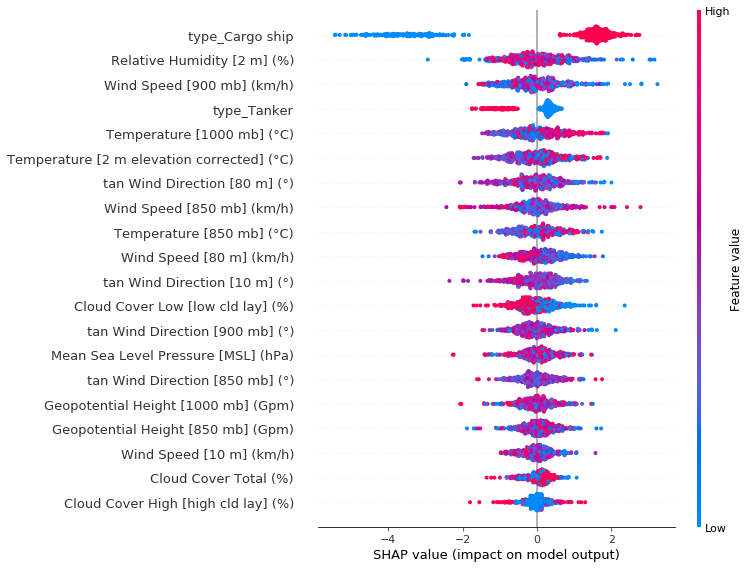

In [16]:
#use of the shap values

shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)

In [47]:
list(X.columns.values[-4:])

['type_Cargo ship', 'type_Fishing vessel', 'type_Ship', 'type_Tanker']

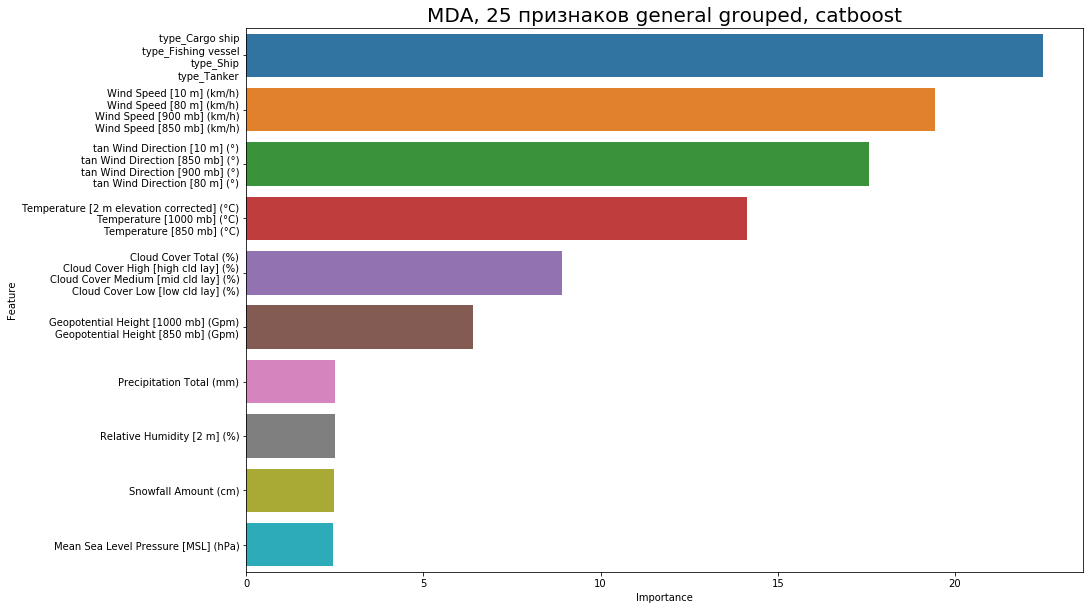

In [57]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков general grouped, catboost', fontsize=20)
plt.show()

**модель, использующая только грузовые корабли** 

In [58]:
data = ships_avg_weather[ships_avg_weather.type == "Cargo ship"]

X = data[features[1:]] # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 6,
                            l2_leaf_reg= 0.1,
                         rsm= 0.8,
                         learning_rate= 0.1,
                         bootstrap_type= 'No')

model.fit(X_train, y_train)

0:	learn: 7.6197383	total: 4.23ms	remaining: 4.23s
1:	learn: 7.4815716	total: 7.82ms	remaining: 3.9s
2:	learn: 7.3488665	total: 13ms	remaining: 4.32s
3:	learn: 7.2122328	total: 17.6ms	remaining: 4.38s
4:	learn: 7.0641631	total: 23.8ms	remaining: 4.73s
5:	learn: 6.9615161	total: 29.7ms	remaining: 4.91s
6:	learn: 6.8035099	total: 36.3ms	remaining: 5.15s
7:	learn: 6.6671268	total: 42.3ms	remaining: 5.24s
8:	learn: 6.5347543	total: 50.5ms	remaining: 5.56s
9:	learn: 6.4149788	total: 53.5ms	remaining: 5.3s
10:	learn: 6.3029496	total: 60.3ms	remaining: 5.42s
11:	learn: 6.1996232	total: 65.3ms	remaining: 5.38s
12:	learn: 6.0720426	total: 71.5ms	remaining: 5.43s
13:	learn: 5.9964058	total: 74.9ms	remaining: 5.27s
14:	learn: 5.9317713	total: 82.1ms	remaining: 5.39s
15:	learn: 5.8474318	total: 86.4ms	remaining: 5.31s
16:	learn: 5.7821310	total: 92.1ms	remaining: 5.33s
17:	learn: 5.7002033	total: 95.5ms	remaining: 5.21s
18:	learn: 5.6469955	total: 102ms	remaining: 5.25s
19:	learn: 5.5322431	total:

164:	learn: 1.0954470	total: 1.03s	remaining: 5.2s
165:	learn: 1.0908587	total: 1.03s	remaining: 5.18s
166:	learn: 1.0804379	total: 1.05s	remaining: 5.24s
167:	learn: 1.0697364	total: 1.06s	remaining: 5.24s
168:	learn: 1.0555729	total: 1.06s	remaining: 5.24s
169:	learn: 1.0438404	total: 1.07s	remaining: 5.22s
170:	learn: 1.0365484	total: 1.08s	remaining: 5.22s
171:	learn: 1.0313149	total: 1.08s	remaining: 5.2s
172:	learn: 1.0200067	total: 1.09s	remaining: 5.2s
173:	learn: 1.0111673	total: 1.09s	remaining: 5.18s
174:	learn: 1.0002050	total: 1.1s	remaining: 5.18s
175:	learn: 0.9872621	total: 1.1s	remaining: 5.16s
176:	learn: 0.9785774	total: 1.11s	remaining: 5.16s
177:	learn: 0.9730691	total: 1.12s	remaining: 5.16s
178:	learn: 0.9566716	total: 1.12s	remaining: 5.16s
179:	learn: 0.9490848	total: 1.13s	remaining: 5.15s
180:	learn: 0.9426113	total: 1.14s	remaining: 5.15s
181:	learn: 0.9393326	total: 1.14s	remaining: 5.14s
182:	learn: 0.9268791	total: 1.15s	remaining: 5.13s
183:	learn: 0.920

344:	learn: 0.2355226	total: 2.22s	remaining: 4.22s
345:	learn: 0.2337675	total: 2.23s	remaining: 4.22s
346:	learn: 0.2309831	total: 2.24s	remaining: 4.21s
347:	learn: 0.2292220	total: 2.25s	remaining: 4.21s
348:	learn: 0.2281609	total: 2.25s	remaining: 4.2s
349:	learn: 0.2262074	total: 2.26s	remaining: 4.2s
350:	learn: 0.2256515	total: 2.27s	remaining: 4.19s
351:	learn: 0.2249171	total: 2.27s	remaining: 4.18s
352:	learn: 0.2238625	total: 2.28s	remaining: 4.18s
353:	learn: 0.2229248	total: 2.29s	remaining: 4.17s
354:	learn: 0.2226077	total: 2.29s	remaining: 4.17s
355:	learn: 0.2218637	total: 2.3s	remaining: 4.16s
356:	learn: 0.2190582	total: 2.31s	remaining: 4.16s
357:	learn: 0.2178547	total: 2.31s	remaining: 4.15s
358:	learn: 0.2160460	total: 2.32s	remaining: 4.14s
359:	learn: 0.2151750	total: 2.32s	remaining: 4.13s
360:	learn: 0.2136022	total: 2.33s	remaining: 4.13s
361:	learn: 0.2127419	total: 2.34s	remaining: 4.12s
362:	learn: 0.2120749	total: 2.35s	remaining: 4.12s
363:	learn: 0.2

514:	learn: 0.0779677	total: 3.41s	remaining: 3.21s
515:	learn: 0.0776475	total: 3.42s	remaining: 3.21s
516:	learn: 0.0774408	total: 3.43s	remaining: 3.21s
517:	learn: 0.0767992	total: 3.44s	remaining: 3.2s
518:	learn: 0.0765158	total: 3.44s	remaining: 3.19s
519:	learn: 0.0759581	total: 3.45s	remaining: 3.19s
520:	learn: 0.0754409	total: 3.46s	remaining: 3.18s
521:	learn: 0.0750514	total: 3.47s	remaining: 3.17s
522:	learn: 0.0746443	total: 3.47s	remaining: 3.17s
523:	learn: 0.0742097	total: 3.48s	remaining: 3.16s
524:	learn: 0.0737318	total: 3.48s	remaining: 3.15s
525:	learn: 0.0732044	total: 3.49s	remaining: 3.14s
526:	learn: 0.0728295	total: 3.49s	remaining: 3.13s
527:	learn: 0.0723132	total: 3.5s	remaining: 3.13s
528:	learn: 0.0719378	total: 3.51s	remaining: 3.13s
529:	learn: 0.0713096	total: 3.52s	remaining: 3.12s
530:	learn: 0.0708457	total: 3.53s	remaining: 3.12s
531:	learn: 0.0704672	total: 3.53s	remaining: 3.11s
532:	learn: 0.0700846	total: 3.54s	remaining: 3.1s
533:	learn: 0.0

683:	learn: 0.0280450	total: 4.6s	remaining: 2.13s
684:	learn: 0.0279357	total: 4.61s	remaining: 2.12s
685:	learn: 0.0278158	total: 4.62s	remaining: 2.11s
686:	learn: 0.0276585	total: 4.62s	remaining: 2.11s
687:	learn: 0.0275625	total: 4.63s	remaining: 2.1s
688:	learn: 0.0274495	total: 4.64s	remaining: 2.09s
689:	learn: 0.0273193	total: 4.64s	remaining: 2.08s
690:	learn: 0.0271627	total: 4.65s	remaining: 2.08s
691:	learn: 0.0270376	total: 4.66s	remaining: 2.07s
692:	learn: 0.0269107	total: 4.66s	remaining: 2.06s
693:	learn: 0.0267198	total: 4.67s	remaining: 2.06s
694:	learn: 0.0264783	total: 4.67s	remaining: 2.05s
695:	learn: 0.0263284	total: 4.68s	remaining: 2.04s
696:	learn: 0.0262227	total: 4.69s	remaining: 2.04s
697:	learn: 0.0260154	total: 4.7s	remaining: 2.03s
698:	learn: 0.0257777	total: 4.71s	remaining: 2.03s
699:	learn: 0.0255256	total: 4.71s	remaining: 2.02s
700:	learn: 0.0254435	total: 4.72s	remaining: 2.01s
701:	learn: 0.0253159	total: 4.73s	remaining: 2.01s
702:	learn: 0.0

856:	learn: 0.0106276	total: 5.78s	remaining: 965ms
857:	learn: 0.0105158	total: 5.79s	remaining: 958ms
858:	learn: 0.0104475	total: 5.79s	remaining: 951ms
859:	learn: 0.0104021	total: 5.8s	remaining: 944ms
860:	learn: 0.0103652	total: 5.81s	remaining: 937ms
861:	learn: 0.0103095	total: 5.81s	remaining: 930ms
862:	learn: 0.0102701	total: 5.82s	remaining: 923ms
863:	learn: 0.0102465	total: 5.82s	remaining: 916ms
864:	learn: 0.0102353	total: 5.83s	remaining: 910ms
865:	learn: 0.0102099	total: 5.83s	remaining: 903ms
866:	learn: 0.0101498	total: 5.84s	remaining: 896ms
867:	learn: 0.0100996	total: 5.85s	remaining: 889ms
868:	learn: 0.0100383	total: 5.85s	remaining: 882ms
869:	learn: 0.0100252	total: 5.86s	remaining: 875ms
870:	learn: 0.0099842	total: 5.87s	remaining: 869ms
871:	learn: 0.0099714	total: 5.87s	remaining: 862ms
872:	learn: 0.0099359	total: 5.88s	remaining: 855ms
873:	learn: 0.0098760	total: 5.88s	remaining: 848ms
874:	learn: 0.0098108	total: 5.89s	remaining: 841ms
875:	learn: 0

In [59]:
print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  0.005070248858042391
MAE =  0.004067788665220369
---test---
RMSE =  5.777702791162724
MAE =  3.930679793677453


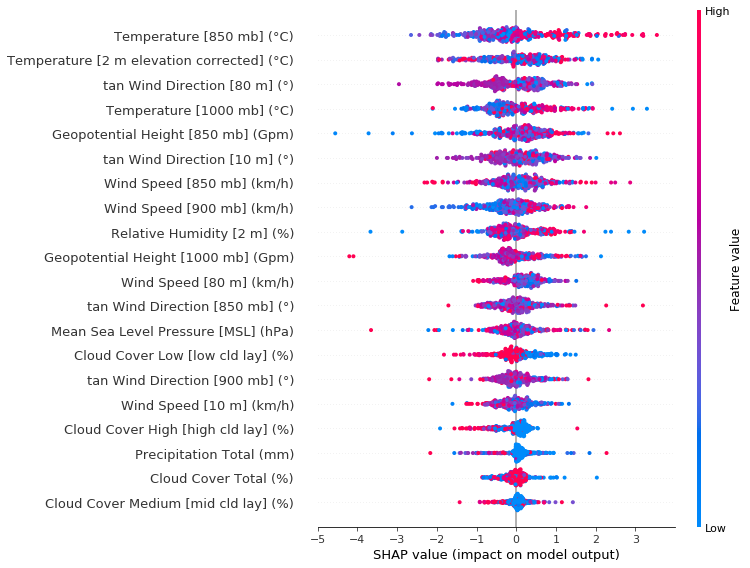

In [60]:
shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)

In [63]:
X.columns

Index(['Temperature [2 m elevation corrected] (°C)',
       'Relative Humidity [2 m] (%)', 'Mean Sea Level Pressure [MSL] (hPa)',
       'Precipitation Total (mm)', 'Snowfall Amount (cm)',
       'Cloud Cover Total (%)', 'Cloud Cover High [high cld lay] (%)',
       'Cloud Cover Medium [mid cld lay] (%)',
       'Cloud Cover Low [low cld lay] (%)', 'Wind Speed [10 m] (km/h)',
       'Wind Speed [80 m] (km/h)', 'Wind Speed [900 mb] (km/h)',
       'Wind Speed [850 mb] (km/h)', 'Geopotential Height [1000 mb] (Gpm)',
       'Geopotential Height [850 mb] (Gpm)', 'Temperature [1000 mb] (°C)',
       'Temperature [850 mb] (°C)', 'tan Wind Direction [10 m] (°)',
       'tan Wind Direction [850 mb] (°)', 'tan Wind Direction [900 mb] (°)',
       'tan Wind Direction [80 m] (°)'],
      dtype='object')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

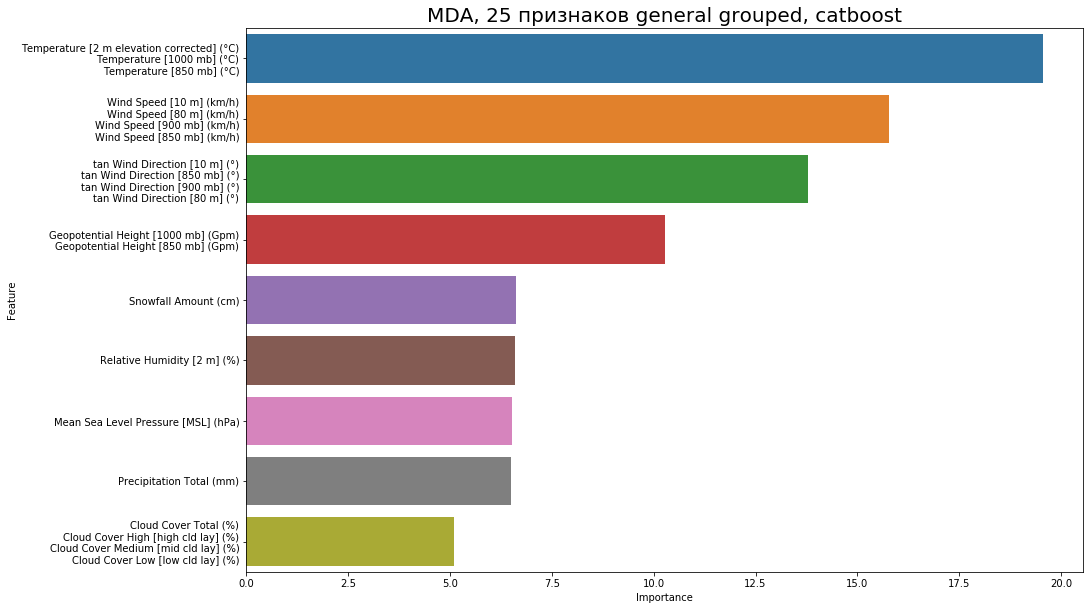

In [66]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков general grouped, catboost', fontsize=20)
plt.show()

**модель, использующая только грузовые танкеры** 

In [79]:
data = ships_avg_weather[ships_avg_weather.type == "Tanker"]

X = data[features[1:]] # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 6,
                            l2_leaf_reg= 0.1,
                         rsm= 0.5,
                         learning_rate= 0.1,
                         bootstrap_type= 'No')

model.fit(X_train, y_train)

0:	learn: 7.6373952	total: 1.77ms	remaining: 1.77s
1:	learn: 7.3224983	total: 5.39ms	remaining: 2.69s
2:	learn: 7.1721710	total: 12.5ms	remaining: 4.16s
3:	learn: 6.8531601	total: 19.5ms	remaining: 4.86s
4:	learn: 6.5836645	total: 24.1ms	remaining: 4.8s
5:	learn: 6.3661514	total: 28.9ms	remaining: 4.79s
6:	learn: 6.2031252	total: 33.3ms	remaining: 4.73s
7:	learn: 5.9349934	total: 37.4ms	remaining: 4.64s
8:	learn: 5.7083187	total: 44ms	remaining: 4.84s
9:	learn: 5.5312705	total: 47.8ms	remaining: 4.74s
10:	learn: 5.2869361	total: 52.2ms	remaining: 4.69s
11:	learn: 5.1766958	total: 63.5ms	remaining: 5.23s
12:	learn: 4.9746002	total: 68.3ms	remaining: 5.19s
13:	learn: 4.7969666	total: 74.6ms	remaining: 5.25s
14:	learn: 4.6666660	total: 79.1ms	remaining: 5.19s
15:	learn: 4.4328087	total: 81.7ms	remaining: 5.02s
16:	learn: 4.3087437	total: 86.4ms	remaining: 5s
17:	learn: 4.2263106	total: 88.8ms	remaining: 4.85s
18:	learn: 4.0893435	total: 91.2ms	remaining: 4.71s
19:	learn: 3.9941737	total: 

168:	learn: 0.0908299	total: 990ms	remaining: 4.87s
169:	learn: 0.0898895	total: 994ms	remaining: 4.85s
170:	learn: 0.0872631	total: 1.01s	remaining: 4.88s
171:	learn: 0.0854767	total: 1.01s	remaining: 4.89s
172:	learn: 0.0824227	total: 1.02s	remaining: 4.88s
173:	learn: 0.0807836	total: 1.03s	remaining: 4.88s
174:	learn: 0.0791363	total: 1.03s	remaining: 4.87s
175:	learn: 0.0779396	total: 1.04s	remaining: 4.88s
176:	learn: 0.0768821	total: 1.04s	remaining: 4.85s
177:	learn: 0.0754841	total: 1.05s	remaining: 4.85s
178:	learn: 0.0746018	total: 1.05s	remaining: 4.83s
179:	learn: 0.0724643	total: 1.06s	remaining: 4.81s
180:	learn: 0.0713082	total: 1.06s	remaining: 4.81s
181:	learn: 0.0698532	total: 1.07s	remaining: 4.8s
182:	learn: 0.0686215	total: 1.08s	remaining: 4.83s
183:	learn: 0.0666239	total: 1.09s	remaining: 4.82s
184:	learn: 0.0659481	total: 1.09s	remaining: 4.8s
185:	learn: 0.0640477	total: 1.09s	remaining: 4.78s
186:	learn: 0.0634531	total: 1.1s	remaining: 4.8s
187:	learn: 0.06

333:	learn: 0.0037222	total: 2.12s	remaining: 4.23s
334:	learn: 0.0036314	total: 2.13s	remaining: 4.22s
335:	learn: 0.0035832	total: 2.13s	remaining: 4.22s
336:	learn: 0.0035466	total: 2.15s	remaining: 4.23s
337:	learn: 0.0034652	total: 2.15s	remaining: 4.22s
338:	learn: 0.0034145	total: 2.16s	remaining: 4.21s
339:	learn: 0.0033494	total: 2.17s	remaining: 4.21s
340:	learn: 0.0033025	total: 2.17s	remaining: 4.19s
341:	learn: 0.0032592	total: 2.18s	remaining: 4.19s
342:	learn: 0.0031922	total: 2.18s	remaining: 4.18s
343:	learn: 0.0031459	total: 2.19s	remaining: 4.17s
344:	learn: 0.0031027	total: 2.19s	remaining: 4.17s
345:	learn: 0.0030390	total: 2.2s	remaining: 4.16s
346:	learn: 0.0029980	total: 2.21s	remaining: 4.15s
347:	learn: 0.0029340	total: 2.21s	remaining: 4.14s
348:	learn: 0.0028945	total: 2.21s	remaining: 4.13s
349:	learn: 0.0028627	total: 2.21s	remaining: 4.11s
350:	learn: 0.0028074	total: 2.22s	remaining: 4.11s
351:	learn: 0.0027526	total: 2.23s	remaining: 4.11s
352:	learn: 0

513:	learn: 0.0001642	total: 3.44s	remaining: 3.25s
514:	learn: 0.0001612	total: 3.45s	remaining: 3.25s
515:	learn: 0.0001602	total: 3.45s	remaining: 3.24s
516:	learn: 0.0001576	total: 3.46s	remaining: 3.23s
517:	learn: 0.0001537	total: 3.46s	remaining: 3.22s
518:	learn: 0.0001511	total: 3.46s	remaining: 3.21s
519:	learn: 0.0001478	total: 3.47s	remaining: 3.21s
520:	learn: 0.0001463	total: 3.48s	remaining: 3.2s
521:	learn: 0.0001443	total: 3.49s	remaining: 3.19s
522:	learn: 0.0001409	total: 3.49s	remaining: 3.18s
523:	learn: 0.0001391	total: 3.5s	remaining: 3.18s
524:	learn: 0.0001347	total: 3.51s	remaining: 3.17s
525:	learn: 0.0001314	total: 3.51s	remaining: 3.17s
526:	learn: 0.0001284	total: 3.52s	remaining: 3.16s
527:	learn: 0.0001253	total: 3.52s	remaining: 3.15s
528:	learn: 0.0001218	total: 3.54s	remaining: 3.15s
529:	learn: 0.0001190	total: 3.54s	remaining: 3.14s
530:	learn: 0.0001181	total: 3.54s	remaining: 3.13s
531:	learn: 0.0001164	total: 3.55s	remaining: 3.12s
532:	learn: 0.

684:	learn: 0.0000082	total: 4.39s	remaining: 2.02s
685:	learn: 0.0000081	total: 4.39s	remaining: 2.01s
686:	learn: 0.0000079	total: 4.4s	remaining: 2s
687:	learn: 0.0000078	total: 4.41s	remaining: 2s
688:	learn: 0.0000077	total: 4.41s	remaining: 1.99s
689:	learn: 0.0000075	total: 4.42s	remaining: 1.98s
690:	learn: 0.0000073	total: 4.42s	remaining: 1.98s
691:	learn: 0.0000072	total: 4.42s	remaining: 1.97s
692:	learn: 0.0000071	total: 4.43s	remaining: 1.96s
693:	learn: 0.0000070	total: 4.44s	remaining: 1.96s
694:	learn: 0.0000069	total: 4.45s	remaining: 1.95s
695:	learn: 0.0000068	total: 4.46s	remaining: 1.95s
696:	learn: 0.0000067	total: 4.46s	remaining: 1.94s
697:	learn: 0.0000066	total: 4.47s	remaining: 1.93s
698:	learn: 0.0000065	total: 4.47s	remaining: 1.93s
699:	learn: 0.0000064	total: 4.48s	remaining: 1.92s
700:	learn: 0.0000063	total: 4.48s	remaining: 1.91s
701:	learn: 0.0000062	total: 4.49s	remaining: 1.9s
702:	learn: 0.0000062	total: 4.5s	remaining: 1.9s
703:	learn: 0.0000060	

863:	learn: 0.0000004	total: 5.51s	remaining: 867ms
864:	learn: 0.0000003	total: 5.51s	remaining: 860ms
865:	learn: 0.0000003	total: 5.51s	remaining: 853ms
866:	learn: 0.0000003	total: 5.52s	remaining: 847ms
867:	learn: 0.0000003	total: 5.52s	remaining: 840ms
868:	learn: 0.0000003	total: 5.53s	remaining: 833ms
869:	learn: 0.0000003	total: 5.53s	remaining: 826ms
870:	learn: 0.0000003	total: 5.54s	remaining: 820ms
871:	learn: 0.0000003	total: 5.54s	remaining: 813ms
872:	learn: 0.0000003	total: 5.55s	remaining: 807ms
873:	learn: 0.0000003	total: 5.55s	remaining: 800ms
874:	learn: 0.0000003	total: 5.55s	remaining: 793ms
875:	learn: 0.0000003	total: 5.56s	remaining: 787ms
876:	learn: 0.0000003	total: 5.56s	remaining: 780ms
877:	learn: 0.0000003	total: 5.57s	remaining: 774ms
878:	learn: 0.0000003	total: 5.57s	remaining: 767ms
879:	learn: 0.0000003	total: 5.58s	remaining: 761ms
880:	learn: 0.0000003	total: 5.58s	remaining: 754ms
881:	learn: 0.0000003	total: 5.59s	remaining: 748ms
882:	learn: 

In [80]:
print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  5.349447172379132e-07
MAE =  4.0797085220010766e-07
---test---
RMSE =  5.917646655508735
MAE =  4.256694639168776


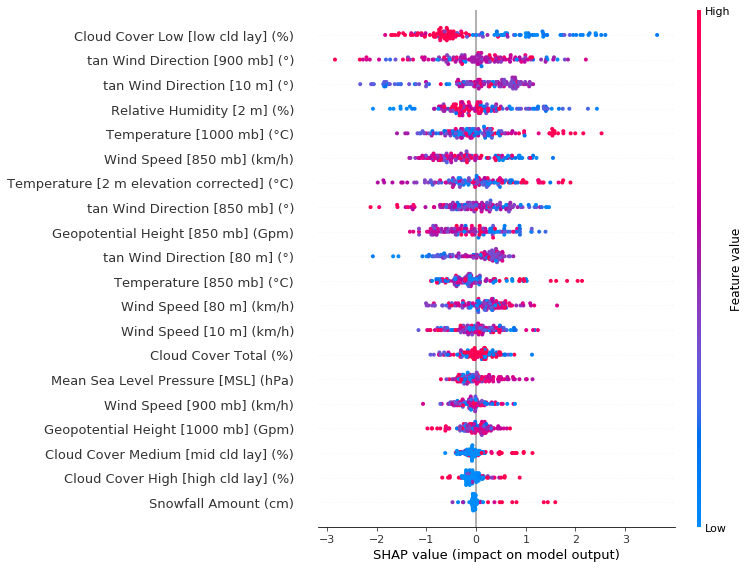

In [82]:
shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

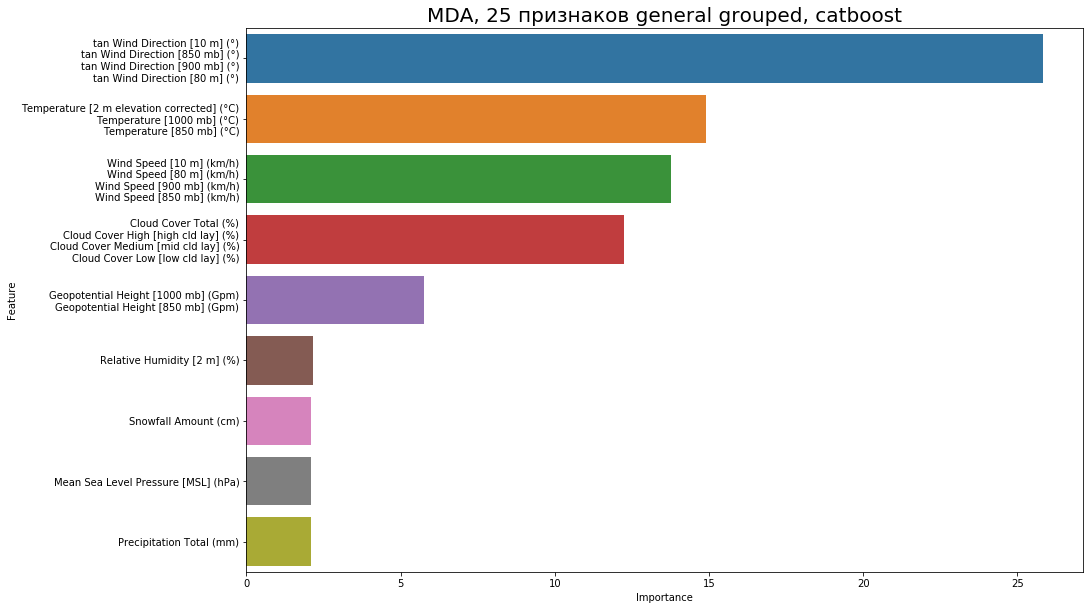

In [83]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns]]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков general grouped, catboost', fontsize=20)
plt.show()

**использование только зоны Японии**

In [86]:
data = ships_avg_weather[ships_avg_weather.zone == "Japan"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 6,
                            l2_leaf_reg= 0.1,
                         rsm= 0.2,
                         learning_rate= 0.1,
                         bootstrap_type= 'No')

model.fit(X_train, y_train)

0:	learn: 7.9433644	total: 4.11ms	remaining: 4.11s
1:	learn: 7.8408653	total: 5.24ms	remaining: 2.62s
2:	learn: 7.6702739	total: 9.08ms	remaining: 3.02s
3:	learn: 7.4762316	total: 13.5ms	remaining: 3.35s
4:	learn: 7.3565066	total: 15.8ms	remaining: 3.15s
5:	learn: 7.2094347	total: 21.2ms	remaining: 3.5s
6:	learn: 7.0994071	total: 24ms	remaining: 3.4s
7:	learn: 6.9776107	total: 28.8ms	remaining: 3.57s
8:	learn: 6.8679554	total: 34.1ms	remaining: 3.75s
9:	learn: 6.7223882	total: 36.4ms	remaining: 3.6s
10:	learn: 6.6148974	total: 54ms	remaining: 4.85s
11:	learn: 6.5092277	total: 65.1ms	remaining: 5.36s
12:	learn: 6.4045749	total: 67.9ms	remaining: 5.16s
13:	learn: 6.2717638	total: 73.1ms	remaining: 5.15s
14:	learn: 6.1982222	total: 82.7ms	remaining: 5.43s
15:	learn: 6.1187375	total: 99.6ms	remaining: 6.12s
16:	learn: 6.0151982	total: 102ms	remaining: 5.87s
17:	learn: 5.9193469	total: 109ms	remaining: 5.94s
18:	learn: 5.8569796	total: 127ms	remaining: 6.56s
19:	learn: 5.7834621	total: 131m

174:	learn: 1.5139142	total: 1.2s	remaining: 5.67s
175:	learn: 1.4975198	total: 1.21s	remaining: 5.65s
176:	learn: 1.4892340	total: 1.21s	remaining: 5.63s
177:	learn: 1.4751232	total: 1.21s	remaining: 5.61s
178:	learn: 1.4613666	total: 1.22s	remaining: 5.6s
179:	learn: 1.4520496	total: 1.23s	remaining: 5.62s
180:	learn: 1.4394360	total: 1.24s	remaining: 5.59s
181:	learn: 1.4250989	total: 1.24s	remaining: 5.56s
182:	learn: 1.4131147	total: 1.24s	remaining: 5.55s
183:	learn: 1.4051955	total: 1.25s	remaining: 5.53s
184:	learn: 1.3898567	total: 1.25s	remaining: 5.51s
185:	learn: 1.3805134	total: 1.26s	remaining: 5.51s
186:	learn: 1.3684293	total: 1.27s	remaining: 5.5s
187:	learn: 1.3529236	total: 1.27s	remaining: 5.48s
188:	learn: 1.3393618	total: 1.27s	remaining: 5.46s
189:	learn: 1.3267321	total: 1.29s	remaining: 5.48s
190:	learn: 1.3111678	total: 1.3s	remaining: 5.5s
191:	learn: 1.3056796	total: 1.3s	remaining: 5.48s
192:	learn: 1.2889144	total: 1.3s	remaining: 5.45s
193:	learn: 1.27786

353:	learn: 0.4261188	total: 2.36s	remaining: 4.3s
354:	learn: 0.4234613	total: 2.36s	remaining: 4.29s
355:	learn: 0.4204014	total: 2.37s	remaining: 4.28s
356:	learn: 0.4190785	total: 2.37s	remaining: 4.27s
357:	learn: 0.4155853	total: 2.38s	remaining: 4.26s
358:	learn: 0.4122077	total: 2.38s	remaining: 4.25s
359:	learn: 0.4094802	total: 2.39s	remaining: 4.25s
360:	learn: 0.4072263	total: 2.4s	remaining: 4.24s
361:	learn: 0.4043736	total: 2.4s	remaining: 4.23s
362:	learn: 0.4026149	total: 2.4s	remaining: 4.22s
363:	learn: 0.4008509	total: 2.41s	remaining: 4.21s
364:	learn: 0.3979268	total: 2.41s	remaining: 4.2s
365:	learn: 0.3936505	total: 2.42s	remaining: 4.19s
366:	learn: 0.3912131	total: 2.42s	remaining: 4.18s
367:	learn: 0.3871626	total: 2.43s	remaining: 4.17s
368:	learn: 0.3858317	total: 2.43s	remaining: 4.16s
369:	learn: 0.3839604	total: 2.44s	remaining: 4.15s
370:	learn: 0.3819306	total: 2.46s	remaining: 4.17s
371:	learn: 0.3798639	total: 2.46s	remaining: 4.16s
372:	learn: 0.377

523:	learn: 0.1650971	total: 3.58s	remaining: 3.25s
524:	learn: 0.1640817	total: 3.58s	remaining: 3.24s
525:	learn: 0.1633368	total: 3.59s	remaining: 3.23s
526:	learn: 0.1617025	total: 3.59s	remaining: 3.22s
527:	learn: 0.1608027	total: 3.6s	remaining: 3.21s
528:	learn: 0.1601627	total: 3.6s	remaining: 3.21s
529:	learn: 0.1593074	total: 3.62s	remaining: 3.21s
530:	learn: 0.1580355	total: 3.63s	remaining: 3.2s
531:	learn: 0.1571102	total: 3.64s	remaining: 3.2s
532:	learn: 0.1559189	total: 3.65s	remaining: 3.2s
533:	learn: 0.1555850	total: 3.65s	remaining: 3.19s
534:	learn: 0.1546251	total: 3.65s	remaining: 3.18s
535:	learn: 0.1536065	total: 3.66s	remaining: 3.17s
536:	learn: 0.1529689	total: 3.67s	remaining: 3.17s
537:	learn: 0.1521212	total: 3.68s	remaining: 3.16s
538:	learn: 0.1514949	total: 3.68s	remaining: 3.15s
539:	learn: 0.1510680	total: 3.69s	remaining: 3.14s
540:	learn: 0.1507949	total: 3.7s	remaining: 3.14s
541:	learn: 0.1501618	total: 3.71s	remaining: 3.13s
542:	learn: 0.1491

692:	learn: 0.0727399	total: 4.73s	remaining: 2.1s
693:	learn: 0.0723313	total: 4.74s	remaining: 2.09s
694:	learn: 0.0718611	total: 4.74s	remaining: 2.08s
695:	learn: 0.0717335	total: 4.75s	remaining: 2.08s
696:	learn: 0.0711189	total: 4.76s	remaining: 2.07s
697:	learn: 0.0707923	total: 4.78s	remaining: 2.07s
698:	learn: 0.0705464	total: 4.78s	remaining: 2.06s
699:	learn: 0.0703239	total: 4.79s	remaining: 2.05s
700:	learn: 0.0700764	total: 4.79s	remaining: 2.04s
701:	learn: 0.0696745	total: 4.8s	remaining: 2.04s
702:	learn: 0.0693985	total: 4.8s	remaining: 2.03s
703:	learn: 0.0690366	total: 4.81s	remaining: 2.02s
704:	learn: 0.0688233	total: 4.82s	remaining: 2.02s
705:	learn: 0.0686230	total: 4.85s	remaining: 2.02s
706:	learn: 0.0682306	total: 4.85s	remaining: 2.01s
707:	learn: 0.0678331	total: 4.87s	remaining: 2.01s
708:	learn: 0.0676254	total: 4.87s	remaining: 2s
709:	learn: 0.0674186	total: 4.88s	remaining: 1.99s
710:	learn: 0.0670684	total: 4.88s	remaining: 1.98s
711:	learn: 0.0665

855:	learn: 0.0350908	total: 5.95s	remaining: 1s
856:	learn: 0.0348679	total: 5.96s	remaining: 994ms
857:	learn: 0.0347165	total: 5.96s	remaining: 987ms
858:	learn: 0.0345484	total: 5.97s	remaining: 980ms
859:	learn: 0.0343943	total: 5.97s	remaining: 973ms
860:	learn: 0.0342095	total: 5.98s	remaining: 965ms
861:	learn: 0.0340575	total: 5.99s	remaining: 958ms
862:	learn: 0.0339628	total: 5.99s	remaining: 951ms
863:	learn: 0.0338364	total: 6s	remaining: 944ms
864:	learn: 0.0336335	total: 6s	remaining: 936ms
865:	learn: 0.0334026	total: 6.01s	remaining: 929ms
866:	learn: 0.0332395	total: 6.01s	remaining: 922ms
867:	learn: 0.0330496	total: 6.01s	remaining: 915ms
868:	learn: 0.0329108	total: 6.02s	remaining: 907ms
869:	learn: 0.0327940	total: 6.02s	remaining: 900ms
870:	learn: 0.0326682	total: 6.03s	remaining: 893ms
871:	learn: 0.0325902	total: 6.03s	remaining: 885ms
872:	learn: 0.0324929	total: 6.04s	remaining: 878ms
873:	learn: 0.0324025	total: 6.04s	remaining: 871ms
874:	learn: 0.0323925

In [87]:
print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  0.019302601564242197
MAE =  0.015029657810133731
---test---
RMSE =  6.2966182325804585
MAE =  4.168180889628019


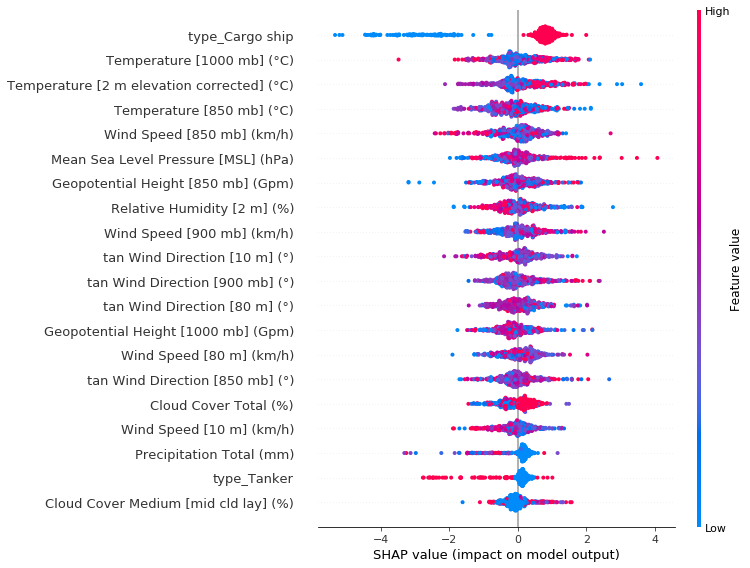

In [88]:
shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)

In [90]:
list(X.columns.values[-4:])

['type_Cargo ship', 'type_Fishing vessel', 'type_Ship', 'type_Tanker']

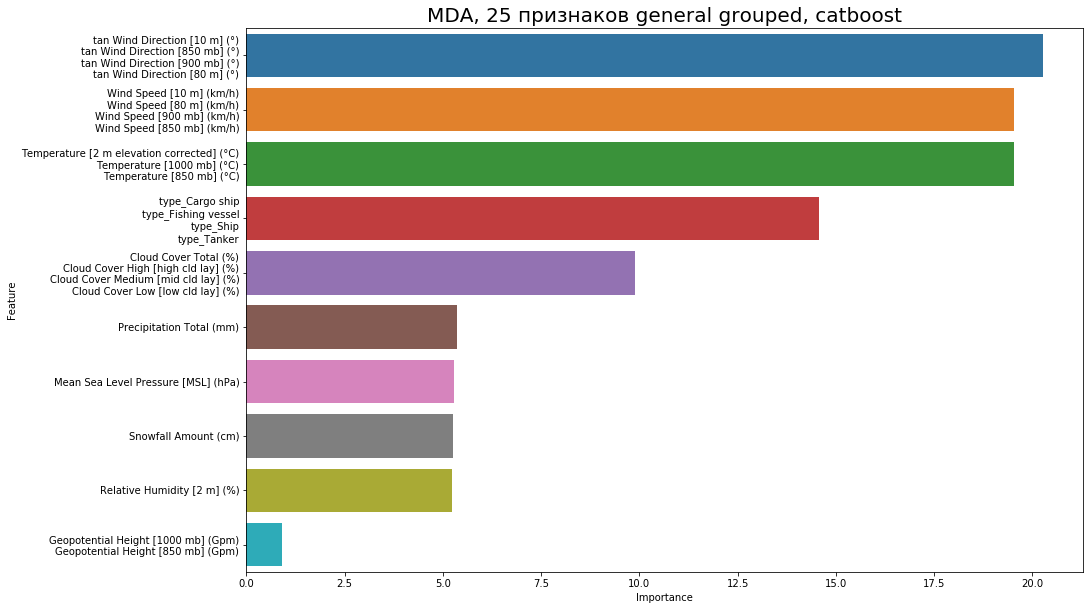

In [91]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков general grouped, catboost', fontsize=20)
plt.show()

**использование только зоны Ньюфаундленда**

In [94]:
data = ships_avg_weather[ships_avg_weather.zone == "Newfoundland"]

X = pd.get_dummies(data[features]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 4,
                            l2_leaf_reg= 0.1,
                         rsm= 0.8,
                         learning_rate= 0.1,
                         bootstrap_type= 'Bernoulli')

model.fit(X_train, y_train)

0:	learn: 6.3895720	total: 10.5ms	remaining: 10.5s
1:	learn: 6.2955987	total: 12.9ms	remaining: 6.44s
2:	learn: 6.1116586	total: 13.9ms	remaining: 4.61s
3:	learn: 6.0052117	total: 14.9ms	remaining: 3.71s
4:	learn: 5.7730695	total: 16.1ms	remaining: 3.21s
5:	learn: 5.6373128	total: 17ms	remaining: 2.81s
6:	learn: 5.5713711	total: 18.1ms	remaining: 2.56s
7:	learn: 5.4829732	total: 19.1ms	remaining: 2.37s
8:	learn: 5.4385294	total: 20.4ms	remaining: 2.24s
9:	learn: 5.2700245	total: 21.4ms	remaining: 2.12s
10:	learn: 5.1317841	total: 23.2ms	remaining: 2.09s
11:	learn: 5.0631130	total: 31.6ms	remaining: 2.6s
12:	learn: 4.9903465	total: 33ms	remaining: 2.5s
13:	learn: 4.9143167	total: 34ms	remaining: 2.39s
14:	learn: 4.8129051	total: 35.2ms	remaining: 2.31s
15:	learn: 4.7588988	total: 36.2ms	remaining: 2.23s
16:	learn: 4.6822529	total: 38.4ms	remaining: 2.22s
17:	learn: 4.5461015	total: 41.3ms	remaining: 2.25s
18:	learn: 4.4630398	total: 43.5ms	remaining: 2.24s
19:	learn: 4.4128856	total: 45

205:	learn: 0.0893826	total: 548ms	remaining: 2.11s
206:	learn: 0.0870241	total: 550ms	remaining: 2.11s
207:	learn: 0.0854255	total: 551ms	remaining: 2.1s
208:	learn: 0.0841929	total: 552ms	remaining: 2.09s
209:	learn: 0.0823623	total: 554ms	remaining: 2.08s
210:	learn: 0.0807469	total: 557ms	remaining: 2.08s
211:	learn: 0.0793027	total: 559ms	remaining: 2.08s
212:	learn: 0.0777347	total: 560ms	remaining: 2.07s
213:	learn: 0.0763682	total: 561ms	remaining: 2.06s
214:	learn: 0.0748297	total: 562ms	remaining: 2.05s
215:	learn: 0.0736909	total: 564ms	remaining: 2.05s
216:	learn: 0.0724942	total: 578ms	remaining: 2.09s
217:	learn: 0.0714677	total: 582ms	remaining: 2.09s
218:	learn: 0.0696009	total: 583ms	remaining: 2.08s
219:	learn: 0.0685708	total: 610ms	remaining: 2.16s
220:	learn: 0.0676366	total: 611ms	remaining: 2.15s
221:	learn: 0.0656901	total: 613ms	remaining: 2.15s
222:	learn: 0.0643724	total: 615ms	remaining: 2.14s
223:	learn: 0.0632346	total: 616ms	remaining: 2.13s
224:	learn: 0

431:	learn: 0.0017779	total: 1.12s	remaining: 1.48s
432:	learn: 0.0017607	total: 1.14s	remaining: 1.5s
433:	learn: 0.0017192	total: 1.15s	remaining: 1.49s
434:	learn: 0.0016996	total: 1.15s	remaining: 1.49s
435:	learn: 0.0016797	total: 1.15s	remaining: 1.49s
436:	learn: 0.0016337	total: 1.15s	remaining: 1.48s
437:	learn: 0.0016057	total: 1.15s	remaining: 1.48s
438:	learn: 0.0015787	total: 1.15s	remaining: 1.47s
439:	learn: 0.0015513	total: 1.15s	remaining: 1.47s
440:	learn: 0.0015317	total: 1.16s	remaining: 1.47s
441:	learn: 0.0015068	total: 1.16s	remaining: 1.46s
442:	learn: 0.0014600	total: 1.16s	remaining: 1.46s
443:	learn: 0.0014427	total: 1.16s	remaining: 1.46s
444:	learn: 0.0013998	total: 1.16s	remaining: 1.45s
445:	learn: 0.0013732	total: 1.17s	remaining: 1.45s
446:	learn: 0.0013550	total: 1.17s	remaining: 1.44s
447:	learn: 0.0013367	total: 1.17s	remaining: 1.44s
448:	learn: 0.0013054	total: 1.17s	remaining: 1.44s
449:	learn: 0.0012695	total: 1.17s	remaining: 1.43s
450:	learn: 0

608:	learn: 0.0000716	total: 1.54s	remaining: 991ms
609:	learn: 0.0000704	total: 1.55s	remaining: 994ms
610:	learn: 0.0000686	total: 1.56s	remaining: 991ms
611:	learn: 0.0000672	total: 1.56s	remaining: 989ms
612:	learn: 0.0000650	total: 1.56s	remaining: 985ms
613:	learn: 0.0000643	total: 1.56s	remaining: 982ms
614:	learn: 0.0000632	total: 1.56s	remaining: 978ms
615:	learn: 0.0000624	total: 1.56s	remaining: 975ms
616:	learn: 0.0000608	total: 1.56s	remaining: 972ms
617:	learn: 0.0000597	total: 1.57s	remaining: 969ms
618:	learn: 0.0000585	total: 1.57s	remaining: 966ms
619:	learn: 0.0000577	total: 1.57s	remaining: 963ms
620:	learn: 0.0000573	total: 1.57s	remaining: 960ms
621:	learn: 0.0000564	total: 1.59s	remaining: 964ms
622:	learn: 0.0000552	total: 1.59s	remaining: 962ms
623:	learn: 0.0000538	total: 1.59s	remaining: 958ms
624:	learn: 0.0000533	total: 1.59s	remaining: 955ms
625:	learn: 0.0000522	total: 1.6s	remaining: 959ms
626:	learn: 0.0000510	total: 1.6s	remaining: 955ms
627:	learn: 0.

767:	learn: 0.0000044	total: 1.99s	remaining: 600ms
768:	learn: 0.0000043	total: 1.99s	remaining: 597ms
769:	learn: 0.0000042	total: 1.99s	remaining: 594ms
770:	learn: 0.0000041	total: 1.99s	remaining: 591ms
771:	learn: 0.0000041	total: 1.99s	remaining: 588ms
772:	learn: 0.0000040	total: 1.99s	remaining: 585ms
773:	learn: 0.0000039	total: 1.99s	remaining: 582ms
774:	learn: 0.0000039	total: 1.99s	remaining: 579ms
775:	learn: 0.0000038	total: 2s	remaining: 576ms
776:	learn: 0.0000037	total: 2s	remaining: 573ms
777:	learn: 0.0000036	total: 2s	remaining: 570ms
778:	learn: 0.0000035	total: 2s	remaining: 568ms
779:	learn: 0.0000034	total: 2s	remaining: 565ms
780:	learn: 0.0000034	total: 2s	remaining: 562ms
781:	learn: 0.0000033	total: 2.01s	remaining: 559ms
782:	learn: 0.0000033	total: 2.01s	remaining: 557ms
783:	learn: 0.0000033	total: 2.01s	remaining: 554ms
784:	learn: 0.0000032	total: 2.01s	remaining: 551ms
785:	learn: 0.0000032	total: 2.01s	remaining: 549ms
786:	learn: 0.0000031	total: 2

928:	learn: 0.0000003	total: 2.41s	remaining: 185ms
929:	learn: 0.0000003	total: 2.42s	remaining: 182ms
930:	learn: 0.0000003	total: 2.42s	remaining: 179ms
931:	learn: 0.0000003	total: 2.42s	remaining: 177ms
932:	learn: 0.0000002	total: 2.42s	remaining: 174ms
933:	learn: 0.0000002	total: 2.42s	remaining: 171ms
934:	learn: 0.0000002	total: 2.42s	remaining: 169ms
935:	learn: 0.0000002	total: 2.44s	remaining: 167ms
936:	learn: 0.0000002	total: 2.45s	remaining: 164ms
937:	learn: 0.0000002	total: 2.45s	remaining: 162ms
938:	learn: 0.0000002	total: 2.45s	remaining: 159ms
939:	learn: 0.0000002	total: 2.45s	remaining: 157ms
940:	learn: 0.0000002	total: 2.45s	remaining: 154ms
941:	learn: 0.0000002	total: 2.46s	remaining: 151ms
942:	learn: 0.0000002	total: 2.46s	remaining: 148ms
943:	learn: 0.0000002	total: 2.46s	remaining: 146ms
944:	learn: 0.0000002	total: 2.46s	remaining: 143ms
945:	learn: 0.0000002	total: 2.46s	remaining: 141ms
946:	learn: 0.0000002	total: 2.46s	remaining: 138ms
947:	learn: 

In [95]:
print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  4.2210865922539993e-07
MAE =  3.145534860983949e-07
---test---
RMSE =  5.972369329245435
MAE =  3.752392188719588


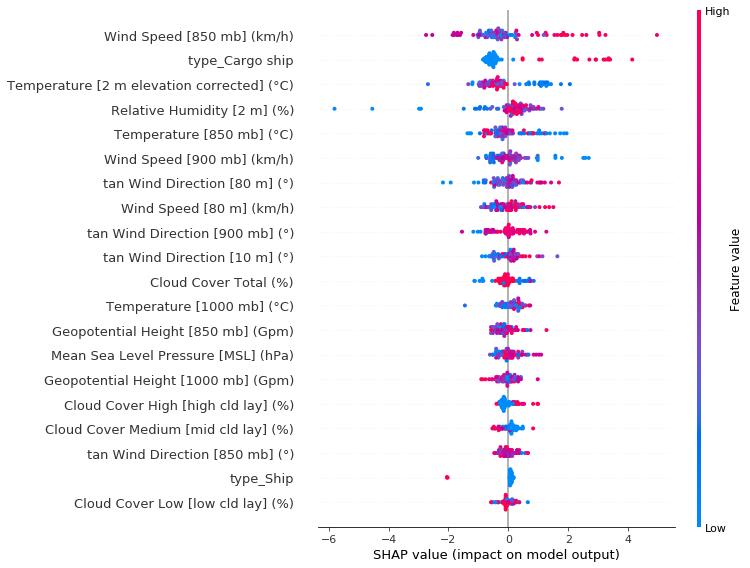

In [96]:
shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)

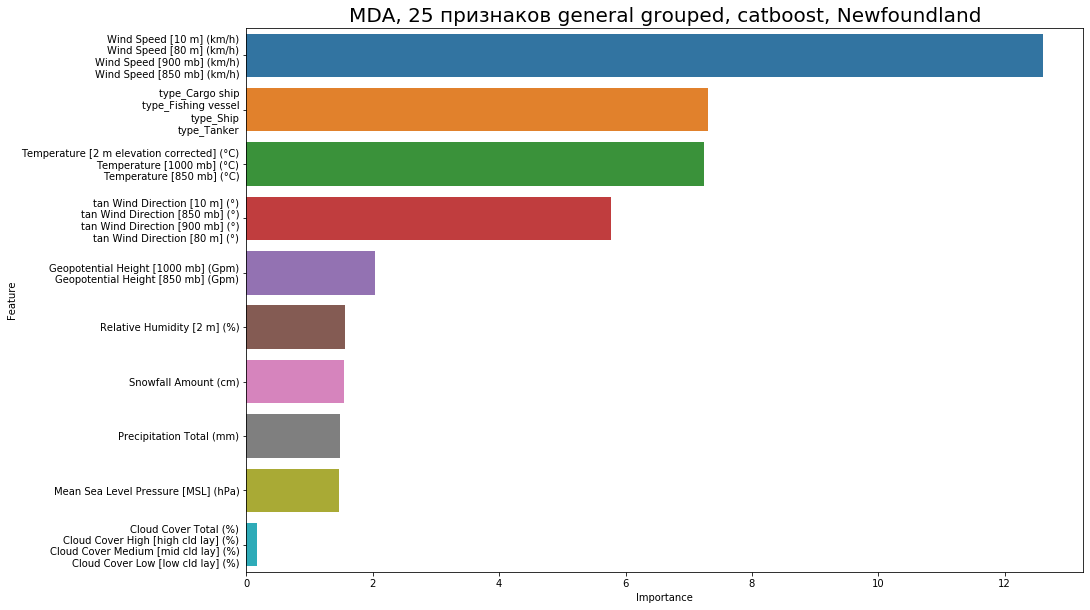

In [100]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                  list(X.columns.values[-4:])]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 25 признаков general grouped, catboost, Newfoundland', fontsize=20)
plt.show()

**модель с использованием признака Draft**

In [103]:
data = ships_avg_weather[ships_avg_weather.entryDraft != "UNK"].astype({'entryDraft': 'float'})

X = pd.get_dummies(data[features + ["entryDraft"]]) # one hot type

y = data['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

model = CatBoostRegressor(depth= 4,
                            l2_leaf_reg= 0.1, 
                         rsm= 0.8,
                         learning_rate= 0.1,
                         bootstrap_type= 'Bernoulli')

model.fit(X_train, y_train)

0:	learn: 8.3593008	total: 1.49ms	remaining: 1.49s
1:	learn: 8.1975213	total: 3.11ms	remaining: 1.55s
2:	learn: 8.0434857	total: 5.14ms	remaining: 1.71s
3:	learn: 7.8807839	total: 6.74ms	remaining: 1.68s
4:	learn: 7.7427399	total: 9.62ms	remaining: 1.91s
5:	learn: 7.6975416	total: 11.2ms	remaining: 1.85s
6:	learn: 7.5935246	total: 13.1ms	remaining: 1.86s
7:	learn: 7.5157774	total: 14.9ms	remaining: 1.85s
8:	learn: 7.4377197	total: 17.1ms	remaining: 1.88s
9:	learn: 7.3466878	total: 18.5ms	remaining: 1.83s
10:	learn: 7.3029118	total: 21ms	remaining: 1.89s
11:	learn: 7.2388524	total: 23ms	remaining: 1.89s
12:	learn: 7.2031256	total: 25.9ms	remaining: 1.96s
13:	learn: 7.1443251	total: 27.7ms	remaining: 1.95s
14:	learn: 7.1214443	total: 30.6ms	remaining: 2.01s
15:	learn: 7.0777385	total: 31.9ms	remaining: 1.96s
16:	learn: 7.0482066	total: 34ms	remaining: 1.96s
17:	learn: 7.0067665	total: 36.3ms	remaining: 1.98s
18:	learn: 6.9509286	total: 38.4ms	remaining: 1.98s
19:	learn: 6.9232654	total: 

214:	learn: 2.7694070	total: 490ms	remaining: 1.79s
215:	learn: 2.7572965	total: 492ms	remaining: 1.78s
216:	learn: 2.7522627	total: 495ms	remaining: 1.78s
217:	learn: 2.7363584	total: 497ms	remaining: 1.78s
218:	learn: 2.7250495	total: 500ms	remaining: 1.78s
219:	learn: 2.7152168	total: 502ms	remaining: 1.78s
220:	learn: 2.7114714	total: 506ms	remaining: 1.78s
221:	learn: 2.7006231	total: 508ms	remaining: 1.78s
222:	learn: 2.6875184	total: 510ms	remaining: 1.78s
223:	learn: 2.6762332	total: 513ms	remaining: 1.78s
224:	learn: 2.6692215	total: 516ms	remaining: 1.77s
225:	learn: 2.6562404	total: 519ms	remaining: 1.78s
226:	learn: 2.6391960	total: 521ms	remaining: 1.77s
227:	learn: 2.6303426	total: 525ms	remaining: 1.78s
228:	learn: 2.6214536	total: 527ms	remaining: 1.77s
229:	learn: 2.6091780	total: 530ms	remaining: 1.77s
230:	learn: 2.5977267	total: 533ms	remaining: 1.77s
231:	learn: 2.5795411	total: 535ms	remaining: 1.77s
232:	learn: 2.5672473	total: 538ms	remaining: 1.77s
233:	learn: 

429:	learn: 1.3647879	total: 980ms	remaining: 1.3s
430:	learn: 1.3584125	total: 982ms	remaining: 1.3s
431:	learn: 1.3560138	total: 986ms	remaining: 1.29s
432:	learn: 1.3521675	total: 988ms	remaining: 1.29s
433:	learn: 1.3449337	total: 990ms	remaining: 1.29s
434:	learn: 1.3406162	total: 992ms	remaining: 1.29s
435:	learn: 1.3388285	total: 995ms	remaining: 1.29s
436:	learn: 1.3343331	total: 998ms	remaining: 1.28s
437:	learn: 1.3319073	total: 999ms	remaining: 1.28s
438:	learn: 1.3272147	total: 1s	remaining: 1.28s
439:	learn: 1.3207828	total: 1s	remaining: 1.28s
440:	learn: 1.3186399	total: 1.01s	remaining: 1.27s
441:	learn: 1.3170326	total: 1.01s	remaining: 1.27s
442:	learn: 1.3124203	total: 1.01s	remaining: 1.27s
443:	learn: 1.3093858	total: 1.01s	remaining: 1.27s
444:	learn: 1.3080871	total: 1.02s	remaining: 1.27s
445:	learn: 1.3031176	total: 1.02s	remaining: 1.26s
446:	learn: 1.3000176	total: 1.02s	remaining: 1.26s
447:	learn: 1.2961853	total: 1.02s	remaining: 1.26s
448:	learn: 1.292913

634:	learn: 0.7781808	total: 1.47s	remaining: 844ms
635:	learn: 0.7771730	total: 1.47s	remaining: 842ms
636:	learn: 0.7741332	total: 1.47s	remaining: 840ms
637:	learn: 0.7718312	total: 1.48s	remaining: 838ms
638:	learn: 0.7687830	total: 1.48s	remaining: 836ms
639:	learn: 0.7674588	total: 1.48s	remaining: 834ms
640:	learn: 0.7655066	total: 1.49s	remaining: 832ms
641:	learn: 0.7641016	total: 1.49s	remaining: 830ms
642:	learn: 0.7630087	total: 1.49s	remaining: 828ms
643:	learn: 0.7617752	total: 1.49s	remaining: 826ms
644:	learn: 0.7604961	total: 1.5s	remaining: 823ms
645:	learn: 0.7581575	total: 1.5s	remaining: 820ms
646:	learn: 0.7549934	total: 1.5s	remaining: 818ms
647:	learn: 0.7531612	total: 1.5s	remaining: 816ms
648:	learn: 0.7511098	total: 1.5s	remaining: 813ms
649:	learn: 0.7481921	total: 1.5s	remaining: 811ms
650:	learn: 0.7464830	total: 1.51s	remaining: 808ms
651:	learn: 0.7454266	total: 1.51s	remaining: 806ms
652:	learn: 0.7432738	total: 1.51s	remaining: 803ms
653:	learn: 0.7414

856:	learn: 0.4794354	total: 1.96s	remaining: 327ms
857:	learn: 0.4786282	total: 1.96s	remaining: 324ms
858:	learn: 0.4768938	total: 1.96s	remaining: 322ms
859:	learn: 0.4767081	total: 1.96s	remaining: 320ms
860:	learn: 0.4754564	total: 1.97s	remaining: 317ms
861:	learn: 0.4745560	total: 1.97s	remaining: 315ms
862:	learn: 0.4737771	total: 1.97s	remaining: 313ms
863:	learn: 0.4729727	total: 1.97s	remaining: 310ms
864:	learn: 0.4721535	total: 1.97s	remaining: 308ms
865:	learn: 0.4713120	total: 1.97s	remaining: 306ms
866:	learn: 0.4707202	total: 1.98s	remaining: 303ms
867:	learn: 0.4696423	total: 1.98s	remaining: 301ms
868:	learn: 0.4684034	total: 1.98s	remaining: 299ms
869:	learn: 0.4662702	total: 1.98s	remaining: 296ms
870:	learn: 0.4654825	total: 1.99s	remaining: 294ms
871:	learn: 0.4652111	total: 1.99s	remaining: 292ms
872:	learn: 0.4638551	total: 1.99s	remaining: 290ms
873:	learn: 0.4634725	total: 1.99s	remaining: 287ms
874:	learn: 0.4630347	total: 2s	remaining: 285ms
875:	learn: 0.4

In [104]:
print("---train---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_train) - y_train)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_train) - y_train)))

print("---test---")
print("RMSE = ", np.sqrt(np.mean((model.predict(X_test) - y_test)**2)))
print("MAE = ", np.mean(np.abs(model.predict(X_test) - y_test)))

---train---
RMSE =  0.3642149133772172
MAE =  0.2879795901704218
---test---
RMSE =  6.207177081416983
MAE =  4.107314595203945


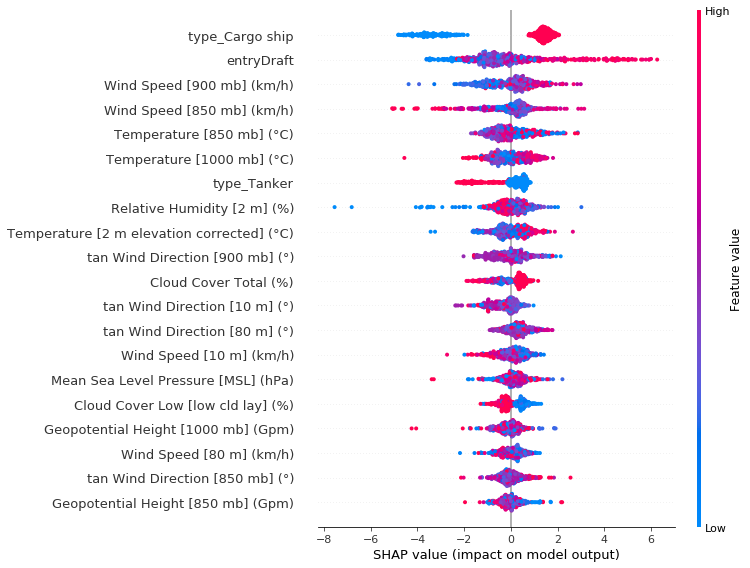

In [106]:
shap_values = model.get_feature_importance(Pool(X, label=y), type="ShapValues")
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)

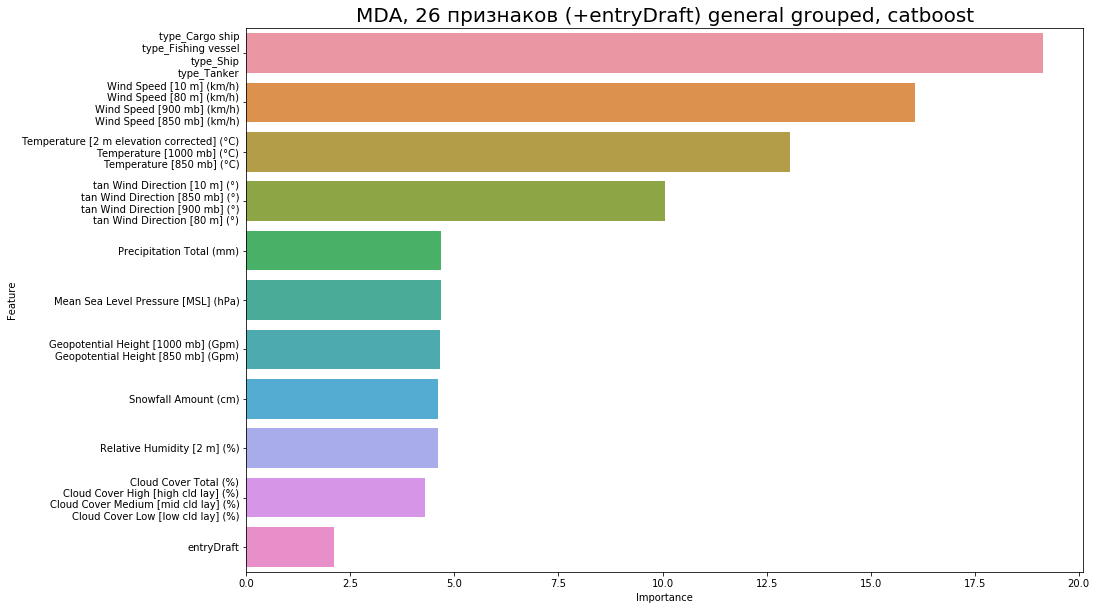

In [108]:
n=100

last_imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                   "entryDraft",
                                  list(X.columns.values[-4:])])

for _ in range(n-1):
    imp = permutation_importances(model, X, y, mse,
                         features=[*grouped_weather_features,
                                            ["tan " + col for col in direct_columns],
                                   "entryDraft",
                                  list(X.columns.values[-4:])]) # permutation
    last_imp += imp
    
imp = (last_imp / n).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(y=imp.index, x=imp.iloc[:, 0])
plt.title('MDA, 26 признаков (+entryDraft) general grouped, catboost', fontsize=20)
plt.show()